# How can NYC Renters Save Money in Today's Hot Rental Market?

David Richter <br>
d.richte@gmail.com <br>
August 8, 2022

### Introduction

Since the start of 2022, New York rental prices have been rising at record levels: over 25% between May 2021 and May 2022. This rate of increase is unprecedented: Since 2007, rents have rarely risen above 5% year over year and never risen above 10% year over year. It also creates a dilemma for renters who are thinking about moving or signing new leases.

### Client Question: Is it better to sign a new lease now or later?

If rental prices are likely to drop, then renters should hold out on moving and signing new leases. However, if prices are likely to rise, then renters should lock in leases sooner rather than later and might be wise to sign two-year leases if possible. 

### General approach: Finding Leading Indicators through SARIMAX modeling.

Predicting whether prices will rise or fall depends on identifying the exogenous variables that leading indicators for increases in rental prices. If we're able to identify leading indicators, than we can use them to more accurately predict rises and falls in rent. This entails building a SARIMAX model, a time series model that regresses on both endogenous and exogenous variables to make its predictions.

### The challenge of modeling rental prices

Because New York rental prices have risen at a relatively steady rate for most of the past fifteen years, identifying leading indicators is challenging. The four main patterns in rental prices over the past fifteen years are:

1. The rise and fall of rents during the period of the 2007-2008 financial crisis.
2. A steady rise from 2010 to 2020.
3. A fall in rents throughout 2020 as a result of COVID-19.
4. A record increase in rents beginning in the summer of 2021.

In short, 10 out of the past 15 years of rental data have a nearly constant upward slope. Our objective is to find one or more exogenous variables that are leading indicators for the most recent dip and rise and that also might reliably predict future dips and rises. However, to establish the reliability of these leading indicators, we should also be able to confirm their predictive power during the relatively uneventful pre-COVID-19 period.

## Target Variable: The StreetEasy Rent Index

As a target variable for modeling, I used the [StreetEasy Rent Index](https://streeteasy.com/blog/data-dashboard), which uses a [repeat-price method](https://streeteasy.com/blog/methodology-price-and-rent-indices/#_ftn2) to measure the increase in New York rents over time. The repeat-price method regresses on increases per month-to-month period based on price changes for units with multiple listings and calculates index values forward and backward relative to the Median StreetEasy listing for the year 2016. Index values are smoothed using a seasonal ARIMA model.


## Exogenous Variables

Since the 2007-2008 financial crisis and COVID-19 are one-off historical events that are either difficult or impossible to model reliably, we need to focus our attention on variables likely to effect the rental market in the short term. I start by looking at 7 categories of variable:

1. Real estate sale prices for Manhattan, Brooklyn, Queens, and NYC as a whole.
2. The average rate of interest on a 30 year fixed-rate mortgage
3. The federal funds rate
4. Total wage and salary earnings for New York State
5. Total personal income in New York State
6. Number of employees in construction in New York State
7. PPI (Producer Price Index) for the cost of building materials
8. The US Consumer Price Index for all Urban Consumers
9. Monthly Mortgage Payments, calculated as a function of real estate prices and average mortgage rates.

Below, I discuss these exogenous variables as well as the data sources for each of these variables. 

#### Real estate sale prices

The relationship betwen sale and rental prices is complex. On the one hand, their prices are both affected by overall supply and demand for housing. On the other had, real estate is a financial asset, so its value is more directly affected than rental prices by long-term expectations of appreciation and by the cost of borrowing.

For real estate price data, I used the [StreetEasy Price Indices](https://streeteasy.com/blog/data-dashboard). StreetEasy calculates price indices for NYC as a whole, Manhattan, Brooklyn, and Queens using the same repeat-price method that is used for the rent index--a method similar to that used to calculate the FHFA House Price Index and the Case-Shiller Home Price Index. Because Manhattan prices are most closely correlated with the New York Rental Market as a whole, I ended up using only Manhattan prices for modeling.

#### Average 30-Year mortgage rate in the US

High mortgage rates are typically indicative of a robust real estate market since they reflect a high demand for borrowing. However, recent [news stories](https://www.nytimes.com/2022/07/11/business/economy/rent-inflation-interest-rates.html) have focused on the fact that because high mortgage rates are cooling the demand for home purchases, they are causing potential buyers to enter the rental market instead, which is in turn driving up rents. 

In turn, a cooler demand for home purchases is likely to bring rates down (this [recent Forbes article](https://fortune.com/2022/08/02/housing-market-correction-mortgage-rates/) suggests that currently declining rates may be pricing in a recession). This means that mortgage rates might not be a good leading indicator of housing trends so much as a mediator of exogenous factors that affect supply and demand for both credit and housing.

Mortgage rate data is from Freddie Mac and is calculated weekly. However, because StreetEasy rental data is calculated on a monthly basis, I resampled Mortgage Data by taking a monthly mean of the weekly figures.

**Source:**
Freddie Mac, 30-Year Fixed Rate Mortgage Average in the United States [MORTGAGE30US], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MORTGAGE30US, July 18, 2022.

#### The federal funds rate

The federal funds rate is the interest rate charged by banks making overnight loans to each other. Because this rate can be manipulated by the Federal Reserve, it may be more effective as a leading indicator than the 30-Year mortgage rate, which is affected both by the federal funds rate as well as by the real estate market. 

However, because the federal funds rate is manipulated in response to economic conditions, it may be challenging to distinguish between the effects of rate changes and effects of the conditions that lead the Fed to increase or decrease target rates in the first place.

**Source:**
Board of Governors of the Federal Reserve System (US), Federal Funds Effective Rate [FEDFUNDS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/FEDFUNDS, July 21, 2022.

#### Total Personal Income for New York State

Personal income for New York State is one measure that may influence housing demand. Personal income is a broad category that includes government benefits as well as dividends, interest and rental income. A high level of total personal income can therefore be caused by factors as various as overall population growth, COVID stimulus spending, increasing wages, and high corporate dividends.

Personal income is calculated on a quarterly basis, so values were forward-filled for the months following each quarterly report.

**Source:**
U.S. Bureau of Economic Analysis and Federal Reserve Bank of St. Louis, Total Personal Income in New York [NYOTOT], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/NYOTOT, July 25, 2022.

#### Wage and Salary Total for New York State

The wage and salary total for New York State is a much narrower measure of consumer demand than total income. Wage and salary totals exclude many sources of income such as government benefits and corporate dividends (sources of income more common for low and high income earners than for median income earners), and it's worth investigating whether the narrower fraction of income represented by this metric may be more be more correlated than total income with housing demand. While ultrawealthy New Yorkers (who derive a larger portion of their income from dividends and rents) still drive demand within the city, a larger than average proportion of the demand they generate is likely for homes and services outside of the city. On the hand, New Yorkers deriving their income from government benefits rather than salary or wages are more likely to live in federal housing projects, in rent-stabilized apartments, or with family members and therefore may also play a smaller role in driving market rents than waged or salaried employees.

Like total income, wage and salary totals are calculated on a quarterly basis, so values were forward-filled for the months following each quarterly report.

**Source:**
U.S. Bureau of Economic Analysis and Federal Reserve Bank of St. Louis, Total Wages and Salaries in New York [NYWTOT], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/NYWTOT, July 20, 2022.



#### Number of Employees in Residential Construction, New York State

Ideally, I would have used data for the number of employees in residential construction in New York City, since this would have served as a proxy for the amount of new housing being created within the city. However, data was only available for total employees in construction in New York City (including employees in non-residential construction). I chose to use state data because residential construction outside of the city would likely decrease some of the upward pressure on the city's housing market, while non-residential construction within the city would do nothing to relieve this pressure. 

In the short term, the amount of residential construction in New York actually turned out to be a leading positive indicator of rental increases rather than a negative indicator. This may be because at shorter lags, construction is anticipating demand in the rental market, but is not being completed fast enough to reduce prices in the short term.

**Source:**
U.S. Bureau of Labor Statistics and Federal Reserve Bank of St. Louis, All Employees: Construction: Residential Building Construction in New York [SMU36000002023610001SA], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/SMU36000002023610001SA, July 22, 2022.

#### Cost of building materials

Since the cost of building materials makes new construction more expensive, it's likely to put upward pressure on the housing market. This seems to be a major way in which supply-chain related inflation has affected and will continue to affect the US housing market. 

**Source:**
U.S. Bureau of Labor Statistics, Producer Price Index by Industry: Building Material and Supplies Dealers [PCU44414441], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PCU44414441, July 19, 2022.

#### Consumer Price Index

The CPI for urban consumers measures the changes in the price of the typical basket of goods purchased by an urban consumer in the US over a given period. CPI is an overall measure of how much consumers are being squeezed by inflation, which in turn affects the demand for housing.

U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL, July 25, 2022.

#### Monthly Mortgage Payments

Monthly mortgage payments are calculated based on the current thirty year Mortgage Rate and on StreetEasy Sale Indices for Manhattan, Queens, Brooklyn and NYC as a whole. They reflect overall demand for housing as well as expectations of inflation and may in turn affect rents by driving priced-out would-be purchasers into the rental market.

### Importing Libraries and Data

In [1]:
# Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pylab import rcParams
%matplotlib inline
import seaborn as sns


import itertools

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Defining functions to read in FRED (Federal Reserve) and StreetEasy Data

def read_fred(filename, title):
    
    """
    Takes in a FRED csv file and returns a dataframe, with datetime values as index and column name set by user.
    """
    
    data = pd.read_csv(f'data/{filename}.csv')
    data['DATE'] = pd.to_datetime(data['DATE'], infer_datetime_format=True)
    data.set_index('DATE', inplace=True)
    data.rename(columns={filename: title}, inplace=True)
    return data

def read_se(filename, title):
    
    
    """
    Takes in csv data representing street easy index values and returns a dataframe, with datetime values as index and column
    name set by user.
    
    """
    
    data = pd.read_csv(f'data/{filename}.csv')
    data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)
    data.set_index('Month', inplace=True)
    data.rename(lambda x: f'{x} {title} Index', axis=1, inplace=True)
    return data

In [3]:
# Reading in FRED and StreetEasy Data

building_materials_ppi = read_fred('PCU44414441', 'Building Materials')
cpi = read_fred('CPIAUCSL', 'CPI')
fed_funds = read_fred('FEDFUNDS', 'Federal Funds Rate')
mortgage_30 = read_fred('MORTGAGE30US', '30 Year Mortgage Rate').resample('MS').mean()
construction_employees = read_fred('SMU36000002023610001SA', 'Employees in Construction')
wage_salary = read_fred('NYWTOT', 'Wages and Salaries').resample('MS').ffill()
personal_income = read_fred('NYOTOT', 'Personal Income').resample('MS').ffill()


sale_data = read_se('priceIndex_All', 'Sale Price')
rental_data = read_se('rentalIndex_All', 'Rental')['NYC Rental Index']

In [4]:
# Inspecting first and last dates of rental data

rental_data

Month
2007-01-01    2204.0
2007-02-01    2160.0
2007-03-01    2177.0
2007-04-01    2191.0
2007-05-01    2216.0
               ...  
2022-01-01    2972.0
2022-02-01    3020.0
2022-03-01    3069.0
2022-04-01    3123.0
2022-05-01    3185.0
Name: NYC Rental Index, Length: 185, dtype: float64

While the StreetEasy Rental Index only includes data from January 2007 to May 2022, we'll combine this with all data from the other datasets, since we'll be using lags from earlier dates as exogenous variables in our models.

In [5]:
# Combining all time series in a single dataframe

all_data = pd.concat([rental_data, fed_funds, mortgage_30, building_materials_ppi, cpi, construction_employees, wage_salary, personal_income, sale_data], axis=1)

In [6]:
# Inspecting End of Dataset for missing values

all_data['2022-01-01':]

,NYC Rental Index,Federal Funds Rate,30 Year Mortgage Rate,Building Materials,CPI,Employees in Construction,Wages and Salaries,Personal Income,Brooklyn Sale Price Index,Manhattan Sale Price Index,NYC Sale Price Index,Queens Sale Price Index
2022-01-01,2972.0,0.08,3.4450,217.684,281.933,59.813755,853004160.0,1514628.1,679811.0,1071336.0,610655.0,512987.0
2022-02-01,3020.0,0.08,3.7625,235.392,284.182,59.994384,NaN,NaN,681075.0,1077736.0,612430.0,515539.0
2022-03-01,3069.0,0.20,4.1720,257.346,287.708,60.764042,NaN,NaN,684634.0,1079077.0,613987.0,517645.0
2022-04-01,3123.0,0.33,4.9825,251.519,288.663,61.356176,NaN,NaN,685194.0,1086098.0,615798.0,519417.0
2022-05-01,3185.0,0.77,5.2300,242.485,291.474,61.498591,NaN,NaN,696957.0,1097375.0,618374.0,517036.0
2022-06-01,NaN,1.21,5.5220,233.562,295.328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-01,NaN,NaN,5.4050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Forward Filling Empty Wage and Salary and Personal Income Values, since this is the only time series
# that doesn't have values through 2022-05-01, the end of the rental data series.
for column in ['Wages and Salaries', 'Personal Income']:
    all_data[column] = all_data[column].ffill()

In addition to including values for earlier dates than our rental values, we also need to include later empty date rows in our dataframe, since we don't want to lose lagged data that we'll need to use to make predictions for future dates.

In [8]:
# Adding additional empty rows so that lagged data is retained.

index = pd.date_range(pd.to_datetime('2022-08-01'), periods=12, freq='MS')
 
columns = list(all_data.columns)
 
next_twelve_months = pd.DataFrame(index=index, columns=columns)

all_data = pd.concat([all_data, next_twelve_months], axis=0)

#### Calculating Monthly Mortgage Payments

In [9]:
all_data['Monthly Interest'] = all_data['30 Year Mortgage Rate']/1200

for column in list(sale_data.columns):
    all_data[f'{column.split()[0]} Monthly Mortgage Payment'] = 0.8*all_data[column]*(all_data['Monthly Interest']*(1 + all_data['Monthly Interest'])**360) / (((1 + all_data['Monthly Interest'])**360)-1)
    
all_data.drop('Monthly Interest', axis=1, inplace=True)

## EDA Target Variable

Before looking at exogenous variables we'll first look at some features of our target variable: The StreetEasy Rental Index

In [10]:
all_data['NYC Rental Index'].describe()

count     185.000000
mean     2559.497297
std       261.622573
min      2119.000000
25%      2340.000000
50%      2572.000000
75%      2775.000000
max      3185.000000
Name: NYC Rental Index, dtype: float64

From the chart below, we can see that NYC rents reached their record level in May 2022: $3185/month as measured by the StreetEasy Rental Index.

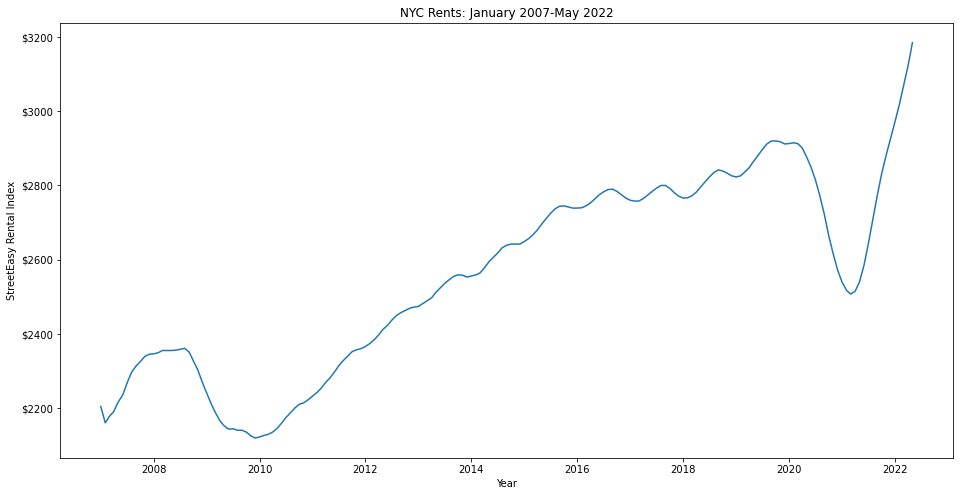

In [11]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(all_data['NYC Rental Index'], label='NYC Rental Index')
ax.set_title('NYC Rents: January 2007-May 2022')

ax.set_xlabel('Year')
ax.set_ylabel('StreetEasy Rental Index')

formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)
plt.savefig('images/rental_index.png')
plt.show()

In [12]:
all_data['Rental Index 12 Month Lag'] = all_data['NYC Rental Index'].shift(periods=12)
all_data['12 Month Increase'] = (100*all_data['NYC Rental Index']/all_data['Rental Index 12 Month Lag'])-100
all_data['12 Month Increase'].dropna().tail()

2022-01-01    17.053958
2022-02-01    19.984108
2022-03-01    22.417232
2022-04-01    24.174950
2022-05-01    25.393701
Freq: MS, Name: 12 Month Increase, dtype: float64

As we see in the plot below, NYC rents increased over 25% betwen May 2021 and May 2022, by far the largest single year increase for all periods included in the StreetEasy NYC Rental Index dataset.

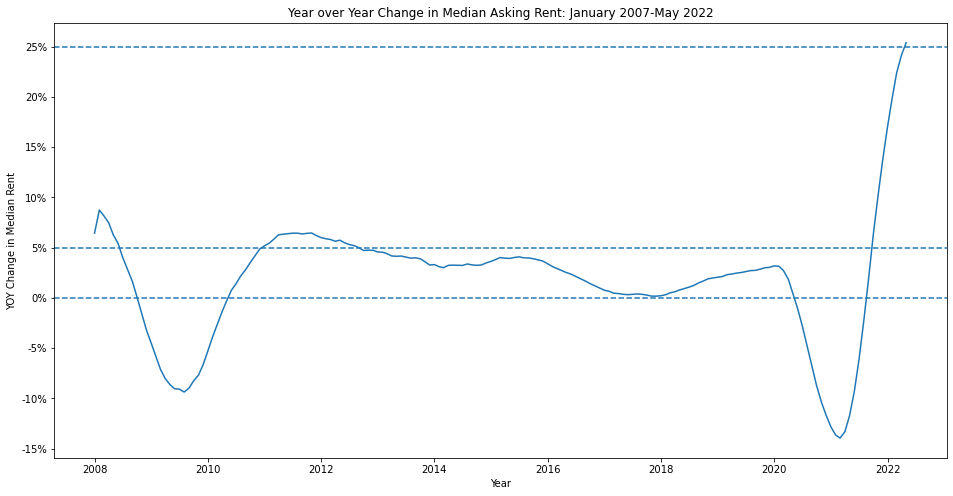

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(all_data['12 Month Increase'])
ax.set_title('Year over Year Change in Median Asking Rent: January 2007-May 2022')

ax.set_xlabel('Year')
ax.set_ylabel('YOY Change in Median Rent')
formatter = ticker.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(formatter)
ax.axhline(y=0, ls='--')
ax.axhline(y=5, ls='--')
ax.axhline(y=25, ls='--')
plt.savefig('images/yoy_increases.png')
plt.show()

In [14]:
all_data.drop(['Rental Index 12 Month Lag', '12 Month Increase'], axis=1, inplace=True)

## Smoothing Exogenous Variables

Since rental prices are more likely to reflect trends in exogenous variables than short term variability, I'm smoothing all of my exogenous variables by recalculating them as a 3 month rolling mean.

In [15]:
for column in list(all_data.drop(['NYC Rental Index', 'Brooklyn Sale Price Index', 'NYC Sale Price Index', 'Queens Sale Price Index'], axis=1).columns):
    all_data[column] = all_data[column].rolling(3).mean()

## Train Test Split

For model building and validation, I split data using an 80-20 split on the data for which rental index values are available. The training data is from January 2007 through April 2019, while the test data is from May 2019 through May 2022. 

Ideally we want to find a model that performs well on both periods. This means that for the training data, our lagged exogenous variables should be able to predict the price fluctuations of the great recession as well as the stable price rises that followed it. For the test data, our model should also be able to provide leading indicators for the fall in rental prices at the beginning of COVID as well as the more recent spike.

In [16]:
# splitting off data with target ('Rental Index') values

rental_data = all_data['2007-01-01':'2022-05-01']

# splitting the data with targets into a training and testing set

train = rental_data.iloc[:int(0.8*len(rental_data))]
test=rental_data.iloc[int(0.8*len(rental_data)):]

### Correlations at 0 Lags

In [17]:
# Inspecting Correlations for first 80% of data set.

train.corr()

,NYC Rental Index,Federal Funds Rate,30 Year Mortgage Rate,Building Materials,CPI,Employees in Construction,Wages and Salaries,Personal Income,Brooklyn Sale Price Index,Manhattan Sale Price Index,NYC Sale Price Index,Queens Sale Price Index,Brooklyn Monthly Mortgage Payment,Manhattan Monthly Mortgage Payment,NYC Monthly Mortgage Payment,Queens Monthly Mortgage Payment
NYC Rental Index,1.000000,-0.113508,-0.578705,0.934946,0.926784,0.850419,0.945808,0.947988,0.610632,0.886661,0.420118,0.096348,-0.013483,0.226224,-0.207440,-0.308918
Federal Funds Rate,-0.113508,1.000000,0.727247,-0.122461,-0.337480,0.290968,-0.022781,-0.157018,0.547757,0.120746,0.709068,0.867733,0.856710,0.712336,0.862880,0.886070
30 Year Mortgage Rate,-0.578705,0.727247,1.000000,-0.576467,-0.708440,-0.131597,-0.479230,-0.606882,0.177561,-0.248784,0.418461,0.657433,0.788362,0.639536,0.898078,0.926067
Building Materials,0.934946,-0.122461,-0.576467,1.000000,0.944730,0.791624,0.938898,0.955919,0.506972,0.772768,0.318069,0.061925,-0.077714,0.137511,-0.258222,-0.328596
CPI,0.926784,-0.337480,-0.708440,0.944730,1.000000,0.699194,0.928935,0.971492,0.373435,0.721639,0.157969,-0.115263,-0.256481,-0.015756,-0.431812,-0.502730
Employees in Construction,0.850419,0.290968,-0.131597,0.791624,0.699194,1.000000,0.887299,0.813180,0.903825,0.957860,0.806701,0.578867,0.473625,0.653673,0.289874,0.195125
Wages and Salaries,0.945808,-0.022781,-0.479230,0.938898,0.928935,0.887299,1.000000,0.983749,0.661010,0.870012,0.481960,0.233134,0.080943,0.290715,-0.115375,-0.191693
Personal Income,0.947988,-0.157018,-0.606882,0.955919,0.971492,0.813180,0.983749,1.000000,0.548363,0.812598,0.342959,0.087049,-0.076063,0.138412,-0.271085,-0.340397
Brooklyn Sale Price Index,0.610632,0.547757,0.177561,0.506972,0.373435,0.903825,0.661010,0.548363,1.000000,0.868798,0.960251,0.801252,0.742122,0.832836,0.580141,0.495589
Manhattan Sale Price Index,0.886661,0.120746,-0.248784,0.772768,0.721639,0.957860,0.870012,0.812598,0.868798,1.000000,0.736854,0.436313,0.365588,0.583729,0.171035,0.051919


In [18]:
# Inspecting correlations for end of data set

test.corr()

,NYC Rental Index,Federal Funds Rate,30 Year Mortgage Rate,Building Materials,CPI,Employees in Construction,Wages and Salaries,Personal Income,Brooklyn Sale Price Index,Manhattan Sale Price Index,NYC Sale Price Index,Queens Sale Price Index,Brooklyn Monthly Mortgage Payment,Manhattan Monthly Mortgage Payment,NYC Monthly Mortgage Payment,Queens Monthly Mortgage Payment
NYC Rental Index,1.000000,0.375106,0.797751,-0.056900,0.335541,0.302177,0.366323,-0.290655,0.759124,0.786730,0.751093,0.731415,0.817693,0.822845,0.795965,0.806549
Federal Funds Rate,0.375106,1.000000,0.624632,-0.666160,-0.530820,0.640923,-0.343082,-0.880147,0.732001,0.811826,0.810297,0.268898,0.694438,0.707630,0.686486,0.589604
30 Year Mortgage Rate,0.797751,0.624632,1.000000,-0.120141,0.118472,0.506418,0.177250,-0.426953,0.733169,0.804666,0.817556,0.731989,0.984173,0.985084,0.992407,0.997533
Building Materials,-0.056900,-0.666160,-0.120141,1.000000,0.878341,-0.009137,0.789034,0.761242,-0.559725,-0.571236,-0.572562,0.213992,-0.264977,-0.256595,-0.231727,-0.076957
CPI,0.335541,-0.530820,0.118472,0.878341,1.000000,0.100311,0.955239,0.654241,-0.278134,-0.265979,-0.269302,0.501800,-0.003579,0.009100,0.018114,0.168064
Employees in Construction,0.302177,0.640923,0.506418,-0.009137,0.100311,1.000000,0.334242,-0.467924,0.337353,0.395634,0.467572,0.477437,0.478783,0.497963,0.499585,0.498367
Wages and Salaries,0.366323,-0.343082,0.177250,0.789034,0.955239,0.334242,1.000000,0.498079,-0.201370,-0.176435,-0.154230,0.597746,0.062964,0.079264,0.086713,0.225190
Personal Income,-0.290655,-0.880147,-0.426953,0.761242,0.654241,-0.467924,0.498079,1.000000,-0.756548,-0.745534,-0.777153,-0.144643,-0.545946,-0.539843,-0.516062,-0.389005
Brooklyn Sale Price Index,0.759124,0.732001,0.733169,-0.559725,-0.278134,0.337353,-0.201370,-0.756548,1.000000,0.925797,0.923806,0.449478,0.831601,0.817763,0.788853,0.708261
Manhattan Sale Price Index,0.786730,0.811826,0.804666,-0.571236,-0.265979,0.395634,-0.176435,-0.745534,0.925797,1.000000,0.959065,0.489489,0.885346,0.894218,0.859175,0.782784


## Results of Correlation

At zero lags a number of variables show high (>0.75) correlations with the rental index:
- Building Materials PPI
- CPI
- Employees in Construction
- Wage and Salary Total
- Personal Income
- Manhattan Sale Prices

For the test set, high correlations (>0.75) are with:
- 30 Year Mortgage Rate
- Sale Prices - Brooklyn, Manhattan, NYC
- Monthly Mortgage Payments - all locations

This is to be expected. As we'll see below, during the recovery decade (2010-2020), trends for most variables remained relatively steady, whereas the COVID period has seen rapid fluctuations. In a more stable economy, the rate at which a dramatic change in one variable can affect another variable is not apparent since most variables are simply moving in steady tandem over the long term. In a more volatile economy the rate at which one variable can affect another can be discernable if we look at correlations over a series of lags.

## Comparing Trends for All Variables

Below we look at how each of our exogenous variables has changed relative to its January 2007 value and compare changes in these exogenous variables with changes in our target variable.

In [19]:
rcParams['figure.figsize'] = 16, 8

def plot_trend(feature, start_date='2007-01-01', lw=1):
    
    """
    Plots trend line for feature with start date value set at 100.
    """
    
    plt.plot(100*all_data[feature][start_date:]/all_data[feature][start_date],
             label=feature,
            lw=lw)
    
def plot_target(start_date='2007-01-01'):
    
    
    """
    Plots trend line for target with start date value set at 100.
    """
    
    plot_trend('NYC Rental Index', start_date=start_date, lw=3)
    plt.title(f'Start Date: {start_date}')
    plt.axhline(y=100, ls='--')
    plt.legend()
    plt.show()
    

#### Sale Price Trends

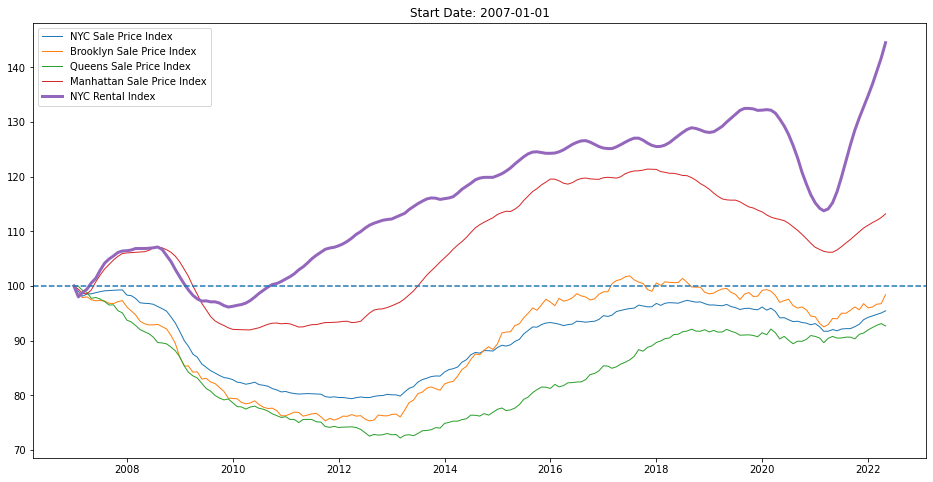

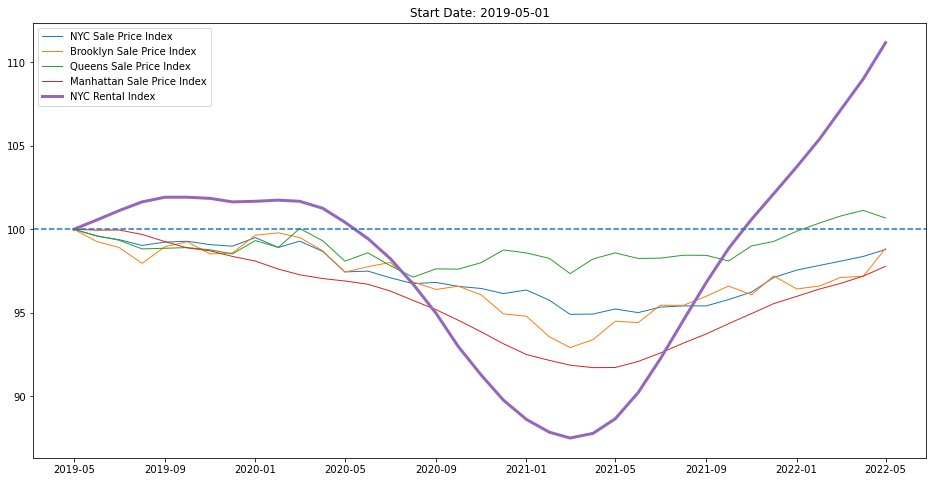

In [20]:
areas = ['NYC', 'Brooklyn', 'Queens', 'Manhattan']

start_dates = ['2007-01-01', '2019-05-01']

for start_date in start_dates:

    for area in areas:
        feature = f'{area} Sale Price Index'
        plot_trend(feature, start_date)

    plot_target(start_date)

During the 2007-2008 financial crisis the value of most homes in New York dropped significantly, while rental prices only dropped briefly in 2009 before rising steadily beginning in 2010.

In most parts of the city home prices only briefly regained their 2007 highs in 2017 and 2018. In Manhattan, on the other hand, home prices, like rent prices have stayed consistently above their 2007 values, though home prices did see a downturn as early as 2018, two years prior to COVID-19.

Manhattan home prices, like New York rents in general, were remarkably resilient during the financial crisis, falling less than home prices in Brooklyn and Queens.

#### Monthly Mortgage Payment Trends

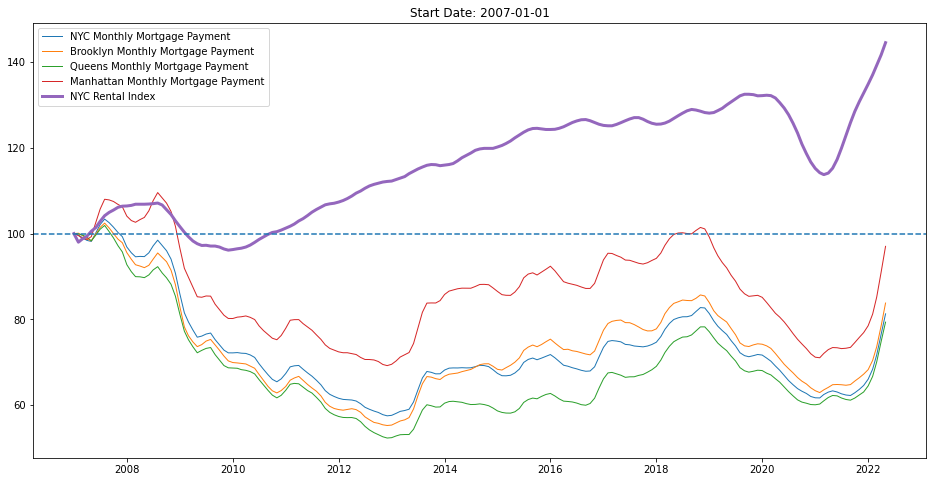

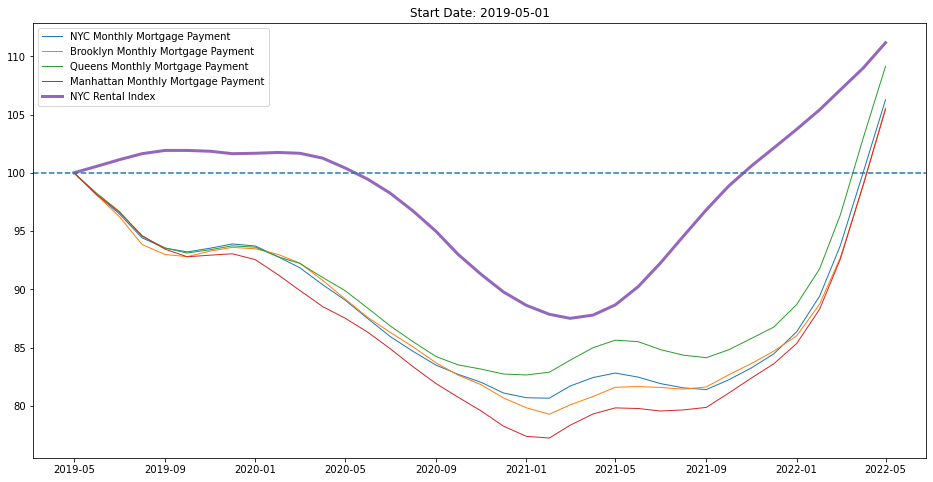

In [21]:
for start_date in start_dates:

    for area in areas:
        feature = f'{area} Monthly Mortgage Payment'
        plot_trend(feature, start_date)

    plot_target(start_date)

During the recovery period from 2013 through 2018, monthly mortgage payments for all parts of New York rose in tandem with New York rents, even though mortgage payments and rent were moving in opposite directions from 2010 through 2012. 

The dramatic drop from 2010 through 2012 results from the combination of falling home prices and low interest rates during that period, while continuing low interests rates produced a slower linear growth in mortgage payments during the recovery as compared with the steeper curve in Sale Price Indices during the same period.

For the 2019-2022 period, monthly payments and rental prices are closely correlated, both bottoming out at the beginning of 2021, before rising at the end of 2021 and into 2022.

#### Wage and Price Trends

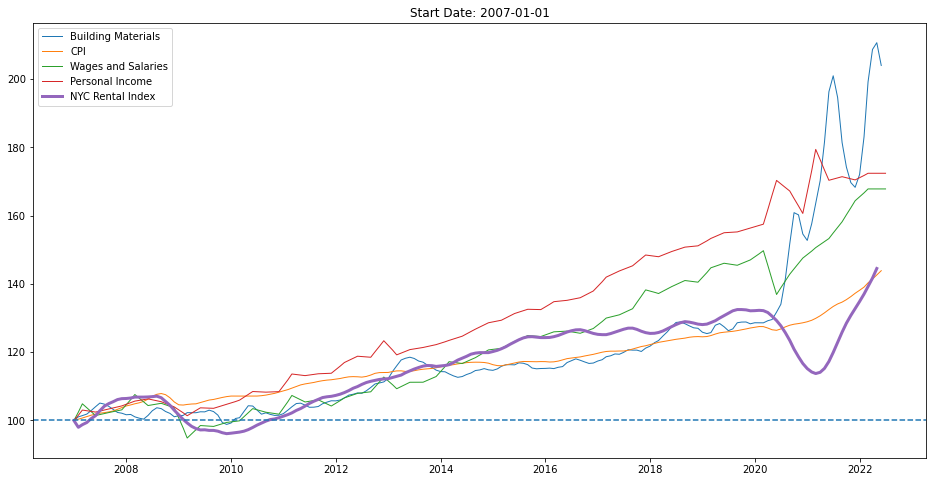

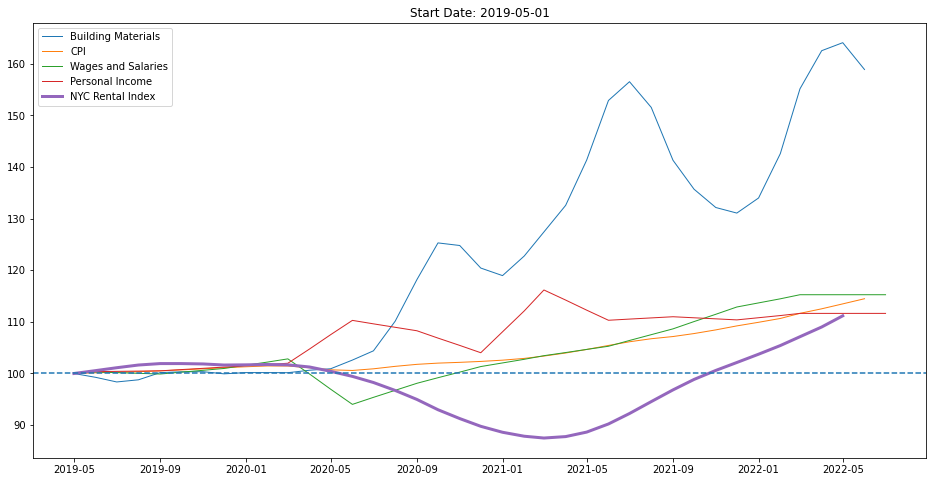

In [22]:
for start_date in start_dates:

    for feature in ['Building Materials', 'CPI', 'Wages and Salaries', 'Personal Income']:
        plot_trend(feature, start_date)
    plot_target(start_date)

In general, rental prices are have been highly correlated with other wage and price trends. 

It should be noted that the high growth in personal income and wage and salary totals does not correspond to high growth in income per household, but to New York's aggregate income, wage and salary growth. These numbers measure the size of the consumer sector as a whole rather than the buying power of individual consumers.

For much of this period total income and wages and salaries rose in tandem with rents, indicating a balance of supply and demand. However, rental price growth began slowing in 2016, while wages, salaries and income continued to grow at the same higher rate. 

Wages and Salaries dropped at the beginning of the pandemic, but pandemic stimulus spending led to an overall rise in incomes. Since then, income, wages and salaries, and the price of building materials have all increased dramatically--making all of these factors potential culprits in the recent rise in rental prices.

#### Construction Trend

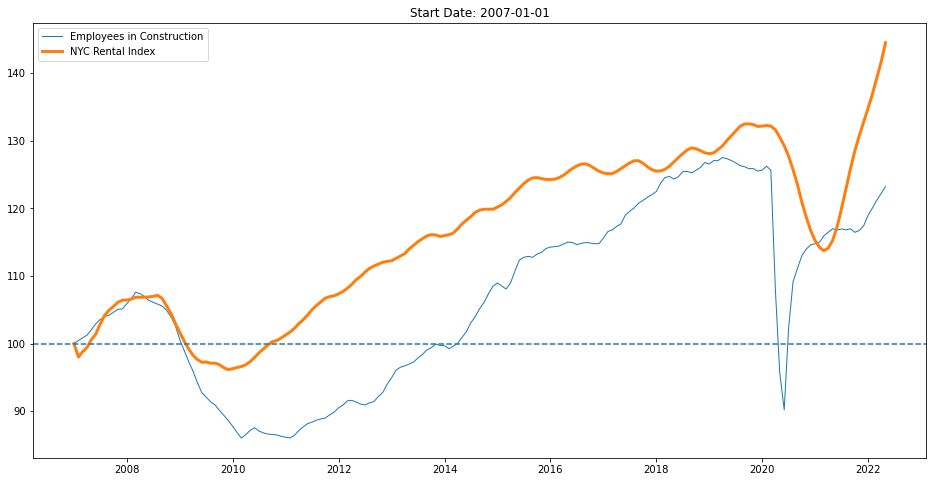

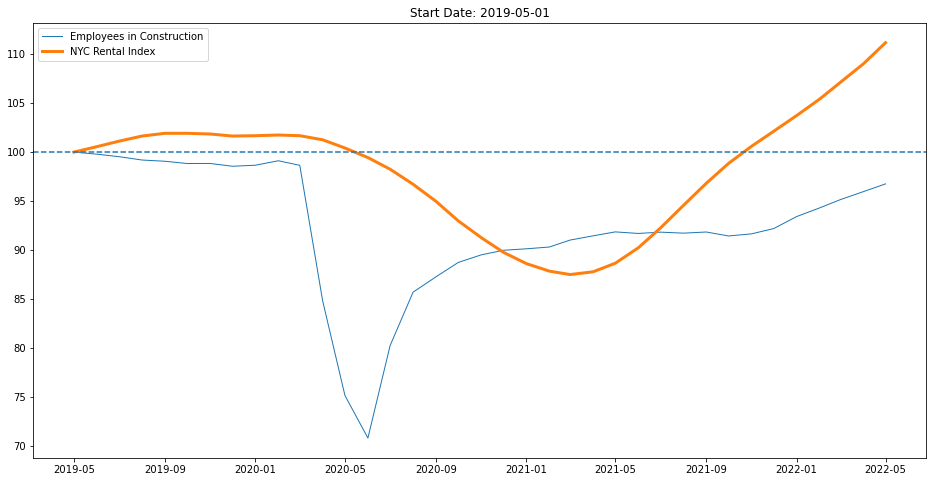

In [23]:
for start_date in start_dates:

    plot_trend('Employees in Construction', start_date)
    plot_target(start_date)

At zero lags, employment in construction is generally correlated with rental prices and the early dramatic drop in construction employees makes it a promising leading indicator for the rental market.

One would expect in the long run that fewer employees in construction would yield less construction and higher prices. Thus the 2020 dip in construction might be correlated with the 2022 rise in prices. The difficulty is that if there isn't a significant negative correlation at 24 months during the training period as well as during the testing period, then this association, no matter how persuasive, won't have the statistical significance that we need if we want to incorporate it into our model.

#### Interest Rate Trends

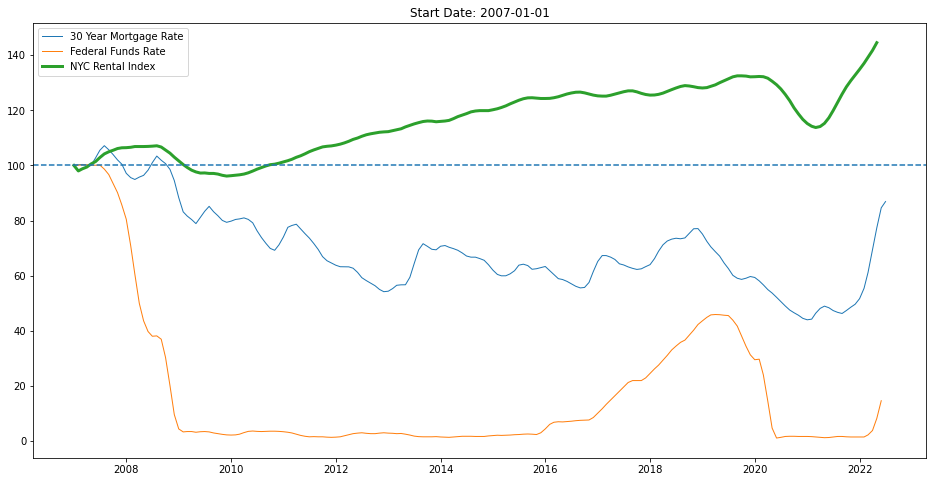

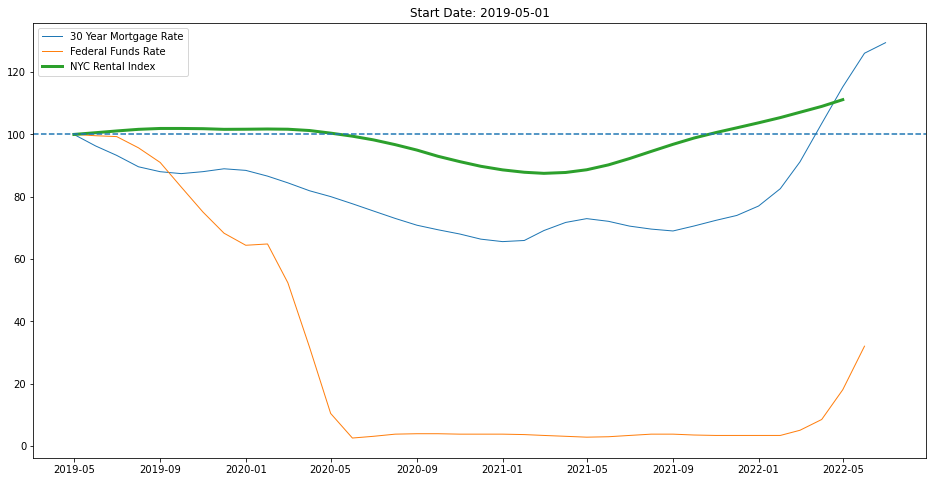

In [24]:
for start_date in start_dates:

    for feature in ['30 Year Mortgage Rate', 'Federal Funds Rate']:
        plot_trend(feature, start_date)
    plot_target(start_date)

Arguments for Fed Interest rate hikes suggest that high interest rates are needed to bring down inflation. From these charts, it's hard to discern a significant relationship between interest rates and rental prices, however. Until recently the cost of borrowing (both short and long term) has been low compared to its 2007 levels, and its too early to know whether the current high short term and mortgage rates will have any effect in bringing down prices.

## What can we learn from lags?

We'll next examine correlations between our target variable and lags of itself and each of the exogenous variables. If we see stronger correlation betwen lags of our exogenous variables and the target than between the non-lagged exogenous variables and the target, then this is a possible indication that the lagged variables are leading indicators of changes in the target variable.

In [25]:
# Determine length of each subset

subset_length = len(rental_data)/5

# Initialize empty lists for dataframes containing correlations for each subset and date ranges for each subset.
corr_df_list = []
dates_list = []

# cycle through each subset of data
for i in range(5):

    
    #find start and end indices for subset
    start_index = int(i*subset_length)
    end_index = int((i+1)*subset_length)
    
    corr_list_subset = []
    
    
    #cycle through each variable
    for variable in list(all_data.columns):
        
        #cycle through each lag
        for lag in range(0, 48):
            
            # generate given lag for given exogenous variable
            exog = all_data[variable].shift(periods=lag)
            
            #subset exogenous lag to given date range
            exog_set = exog['2007-01-01':'2022-05-01']
            exog_subset = exog_set.iloc[start_index:end_index]
            
            #subset endogenous variable to given date range
            endog = all_data['NYC Rental Index']
            endog_set = endog['2007-01-01':'2022-05-01']
            endog_subset = endog_set.iloc[start_index:end_index]
            
            # create data frame with target variable and exogenous lag for given date range
            df_temp=pd.concat([endog_subset, exog_subset], axis=1)
            
            # calculate correlation between target variable and exogenous lag and append to correlation list
            corr_list_subset.append([variable, lag, df_temp.corr().iloc[0, 1]])
    
    #append date range to dates list before cycling to next date range
    dates_list.append([df_temp.index[0], df_temp.index[-1]]) 
    
    #make list of correlations for date subset into a dataframe 
    corr_df_list.append(pd.DataFrame(corr_list_subset, columns=['variable', 'lag', 'corr']))

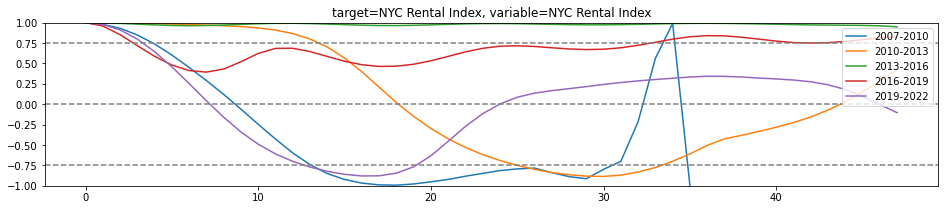

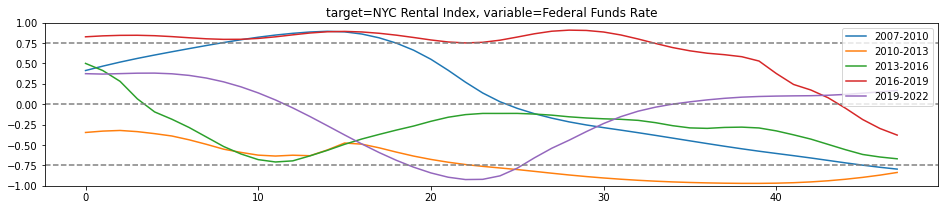

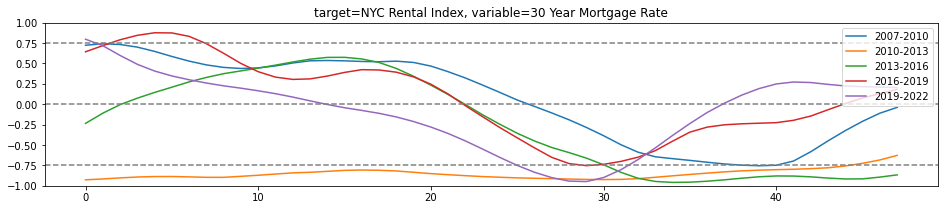

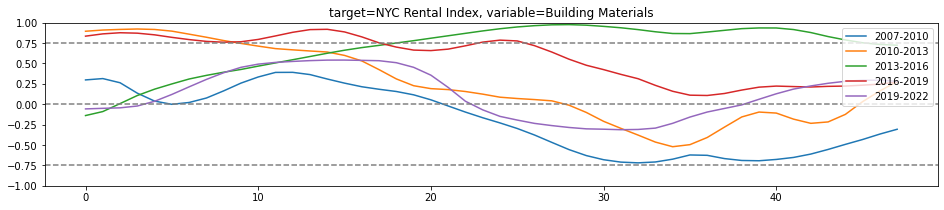

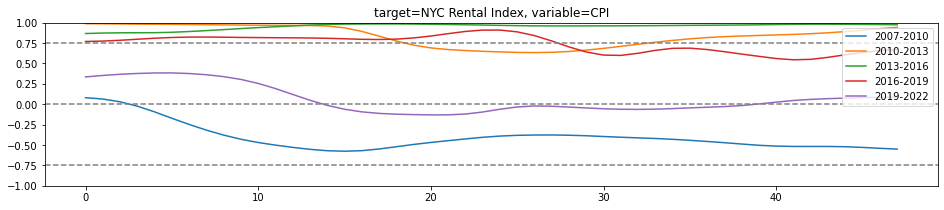

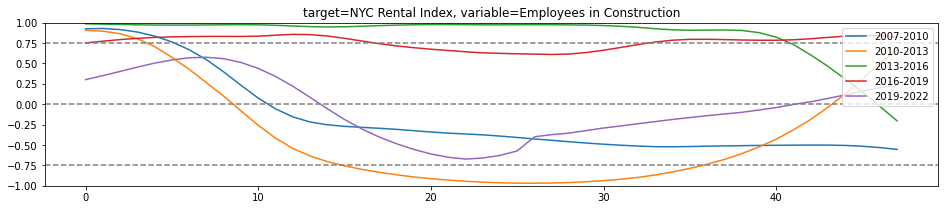

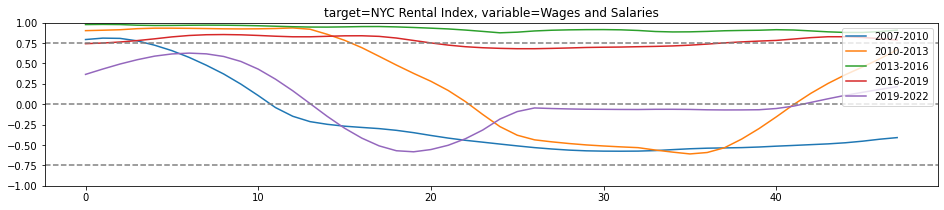

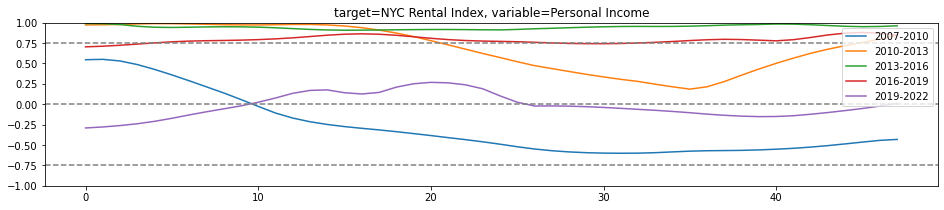

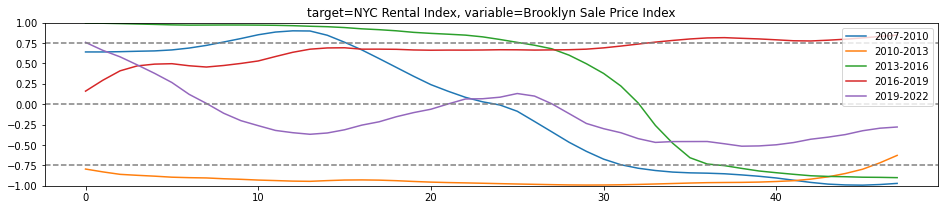

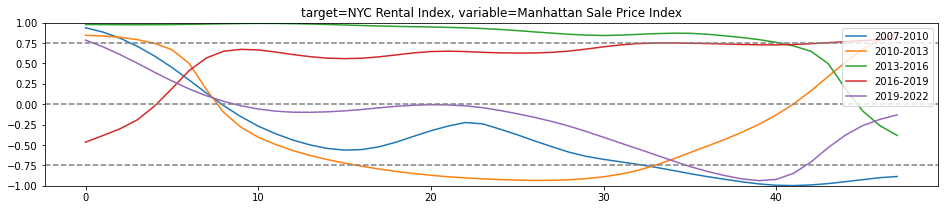

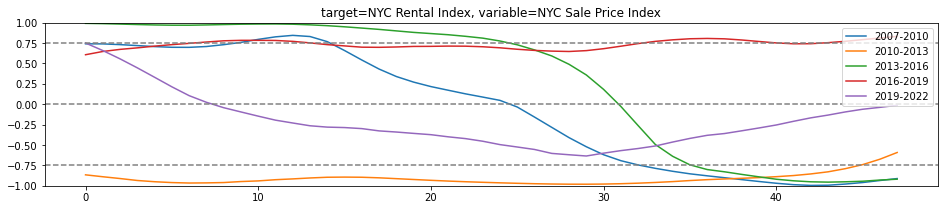

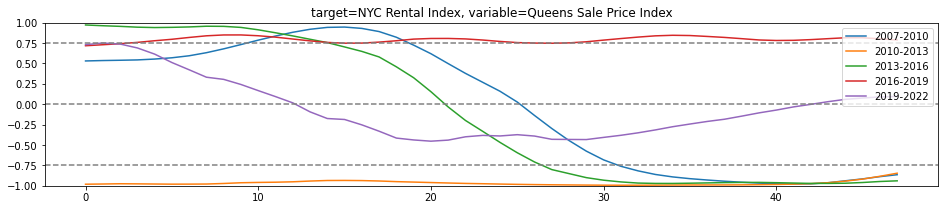

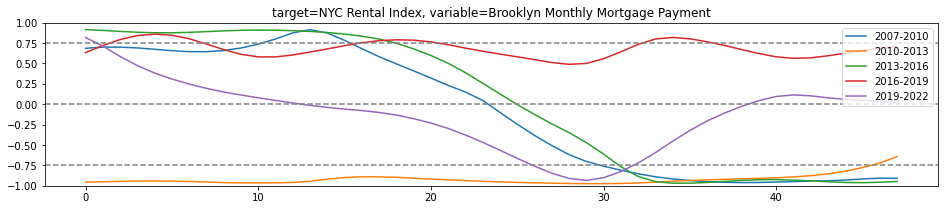

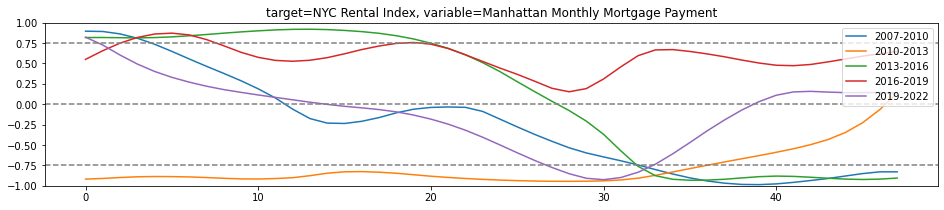

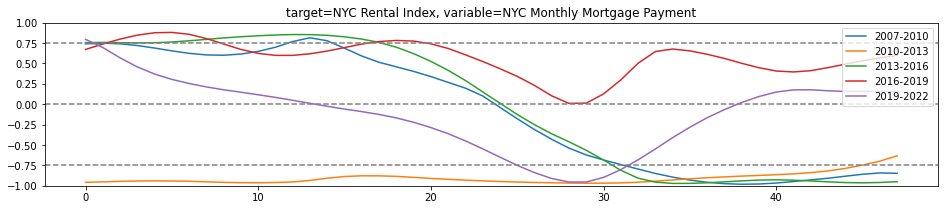

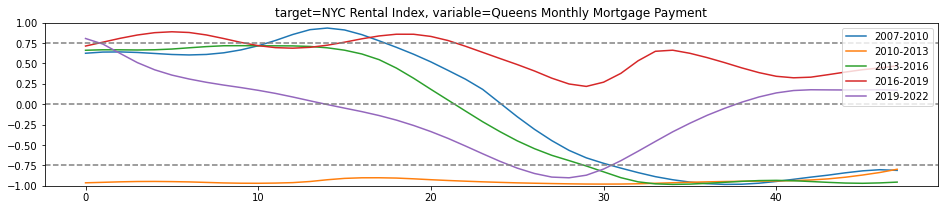

In [26]:
rcParams['figure.figsize'] = 16, 3

# Make series of plots for each variable, comparing correlations for each date subset.

# cycle through variables
for variable in list(all_data.columns):
    #cycle through subsets
    for i in range(len(corr_df_list)):
        
            #pulls out each date subset for the given variable
            subset = corr_df_list[i][corr_df_list[i]['variable']==variable]
            
            # determines start and end dates for subset 
            start_date = str(dates_list[i][0])[:4]
            end_date = str(dates_list[i][1])[:4]
            
            # plots correlations for each date subset with labeled with appropriate dates
            plt.plot(subset['lag'], subset['corr'], label=f'{start_date}-{end_date}')
    
    
    plt.title(f'target=NYC Rental Index, variable={variable}')
    plt.axhline(y=0.75, color='gray', ls='--')
    plt.axhline(y=0, color='gray', ls='--')
    plt.axhline(y=-0.75, color='gray', ls='--')
    
    plt.ylim([-1, 1])
    plt.legend(loc='upper right')
    plt.show()

## Evaluating Lags

#### Autocorrelation

When lagged against themselves, rental values show a high autocorrelation at lag 1 followed by diminishing autocorrelation values as lags increase. Autocorrelation remains close to 1 for all lags for the 2013-2016 period and positive for all lags for the 2016-2019 period, but drops into negative values for the 2007-2010 period(the great recession), the 2010-2013 period (recovery from the great recession), and the 2019-2022 period (COVID-19). This is indicative of the fact that rental prices increased at a consistent rate during periods of stability, while fluctuating during periods of crisis.

#### Correlation with Sale price lags

In general, sale prices have the highest correlation with rental prices at 0 lags. However, during the 2010 period, sale and rental prices had negative correlations at all lags, since rents were steadily moving up while sale prices in most boroughs were continuing to crater. The one exception is Manhattan. In Manhattan, lag 0 correlation was negative only for the 2016-2019 period, when prices fell as rents rose. However, correlations with Manhattan prices are positive around lag 6 for all periods, suggesting the possibility that Manhattan prices be useful for predicting NYC rents at six lags.

#### Fed Funds and Mortgage Rate

For both the Federal Funds Rate and the Mortgage correlations at 0 lags range over positive and negative values. For the Fed Funds Rate, there is no lag that has consistent positive or negative correlations, while for the Mortgage Rate, there are consistently negative correlations with Rental prices between lags 30 and 35. While this may have some significance the fact that this correlation occurs at such a large lag should make us hesistant to use it in our modeling.

#### Cost of Building Material

At 0 lags, correlations between rent and the cost of building materials are inconsistent. For the 2010-2013 and 2016-2019 periods, there is a very high correlation, for 2007-2010 there is a small positive correlation, and for the remaining two periods there is basically no correlation. However, at around 12 lags, we see consistently positive correlations. The lowest correlation for 12 lags is during the 2007-2010 period, for which we see a 0.39 correlation. This is the highest correlation for any lag during this period. Similarly, we see the highest correlation at lag 14 for the 2016-2019 period and at lag 15 for the 2019-2022 period. These consistently strong lagged correlations strongly supports the theory that building material costs may affect the rental market at around a one year lag.

#### Employees in Construction and Wage and Salary Totals

For both these variables we see consistently high values for lags of 0 through 8 months. While the peaks are inconsistent, correlations are consistently strong around 6 months, suggesting that six month lags may be good predictive variables for our model.

For Employees in Construction we see strong negative correlations at a 2 year lag for three of our periods, but consistently strong positive correlations for the 2013-2019 period when the Rental Index and Employees in Construction were both rising steadily. During the 2019 period, however, we see a bit of a dip in correlation around the 2 year lag, suggesting that it might be worth modeling Employes in Construction with a 2 year lag as well as with a 6 Month Lag.

In [27]:
# calculates min and max values for each variable and data subset and combines them in a min_max dataframe

min_list = []

for column in list(all_data.columns):
    small_df = pd.concat([data[data['variable']==column].sort_values(by='corr').head(1) for data in corr_df_list], axis=0)
    small_df['group'] = [f'{str(n[0])[:4]}-{str(n[1])[:4]}' for n in dates_list]
    min_list.append(small_df)
    
max_list = []

for column in list(all_data.columns):
    small_df = pd.concat([data[data['variable']==column].sort_values(by='corr').tail(1) for data in corr_df_list], axis=0)
    small_df['group'] = [f'{str(n[0])[:4]}-{str(n[1])[:4]}' for n in dates_list]
    max_list.append(small_df)
    
min_max = pd.concat(min_list+max_list, axis=0)


In [28]:
for variable in list(all_data.columns):
    display(min_max[min_max['variable']==variable])

,variable,lag,corr,group
35,NYC Rental Index,35,-1.000000,2007-2010
30,NYC Rental Index,30,-0.884955,2010-2013
47,NYC Rental Index,47,0.950030,2013-2016
7,NYC Rental Index,7,0.394327,2016-2019
16,NYC Rental Index,16,-0.879228,2019-2022
47,NYC Rental Index,47,NaN,2007-2010
0,NYC Rental Index,0,1.000000,2010-2013
0,NYC Rental Index,0,1.000000,2013-2016
0,NYC Rental Index,0,1.000000,2016-2019
0,NYC Rental Index,0,1.000000,2019-2022


,variable,lag,corr,group
95,Federal Funds Rate,47,-0.795298,2007-2010
87,Federal Funds Rate,39,-0.970258,2010-2013
59,Federal Funds Rate,11,-0.707891,2013-2016
95,Federal Funds Rate,47,-0.378106,2016-2019
70,Federal Funds Rate,22,-0.923363,2019-2022
62,Federal Funds Rate,14,0.894901,2007-2010
50,Federal Funds Rate,2,-0.321317,2010-2013
48,Federal Funds Rate,0,0.501105,2013-2016
76,Federal Funds Rate,28,0.909055,2016-2019
52,Federal Funds Rate,4,0.382030,2019-2022


,variable,lag,corr,group
135,30 Year Mortgage Rate,39,-0.754206,2007-2010
96,30 Year Mortgage Rate,0,-0.926747,2010-2013
130,30 Year Mortgage Rate,34,-0.958262,2013-2016
125,30 Year Mortgage Rate,29,-0.752878,2016-2019
125,30 Year Mortgage Rate,29,-0.948058,2019-2022
97,30 Year Mortgage Rate,1,0.742105,2007-2010
143,30 Year Mortgage Rate,47,-0.627052,2010-2013
111,30 Year Mortgage Rate,15,0.575491,2013-2016
100,30 Year Mortgage Rate,4,0.876763,2016-2019
96,30 Year Mortgage Rate,0,0.797751,2019-2022


,variable,lag,corr,group
176,Building Materials,32,-0.718631,2007-2010
178,Building Materials,34,-0.520682,2010-2013
144,Building Materials,0,-0.138442,2013-2016
180,Building Materials,36,0.107635,2016-2019
175,Building Materials,31,-0.312154,2019-2022
156,Building Materials,12,0.391405,2007-2010
147,Building Materials,3,0.923006,2010-2013
172,Building Materials,28,0.976593,2013-2016
158,Building Materials,14,0.919186,2016-2019
159,Building Materials,15,0.541849,2019-2022


,variable,lag,corr,group
207,CPI,15,-0.575922,2007-2010
218,CPI,26,0.633935,2010-2013
192,CPI,0,0.867661,2013-2016
233,CPI,41,0.545468,2016-2019
212,CPI,20,-0.130363,2019-2022
192,CPI,0,0.080433,2007-2010
192,CPI,0,0.988111,2010-2013
209,CPI,17,0.985152,2013-2016
216,CPI,24,0.909902,2016-2019
197,CPI,5,0.384273,2019-2022


,variable,lag,corr,group
287,Employees in Construction,47,-0.553597,2007-2010
266,Employees in Construction,26,-0.968069,2010-2013
287,Employees in Construction,47,-0.204580,2013-2016
267,Employees in Construction,27,0.610594,2016-2019
262,Employees in Construction,22,-0.672394,2019-2022
241,Employees in Construction,1,0.929048,2007-2010
240,Employees in Construction,0,0.907643,2010-2013
240,Employees in Construction,0,0.986892,2013-2016
252,Employees in Construction,12,0.857069,2016-2019
247,Employees in Construction,7,0.576199,2019-2022


,variable,lag,corr,group
319,Wages and Salaries,31,-0.575765,2007-2010
323,Wages and Salaries,35,-0.609201,2010-2013
312,Wages and Salaries,24,0.876199,2013-2016
313,Wages and Salaries,25,0.681231,2016-2019
307,Wages and Salaries,19,-0.582961,2019-2022
289,Wages and Salaries,1,0.811090,2007-2010
300,Wages and Salaries,12,0.936055,2010-2013
289,Wages and Salaries,1,0.979373,2013-2016
296,Wages and Salaries,8,0.854886,2016-2019
294,Wages and Salaries,6,0.627266,2019-2022


,variable,lag,corr,group
367,Personal Income,31,-0.600871,2007-2010
371,Personal Income,35,0.185438,2010-2013
351,Personal Income,15,0.907905,2013-2016
336,Personal Income,0,0.704227,2016-2019
336,Personal Income,0,-0.290655,2019-2022
337,Personal Income,1,0.550939,2007-2010
340,Personal Income,4,0.988902,2010-2013
336,Personal Income,0,0.990236,2013-2016
381,Personal Income,45,0.880222,2016-2019
356,Personal Income,20,0.268642,2019-2022


,variable,lag,corr,group
429,Brooklyn Sale Price Index,45,-0.992128,2007-2010
413,Brooklyn Sale Price Index,29,-0.990786,2010-2013
431,Brooklyn Sale Price Index,47,-0.900044,2013-2016
384,Brooklyn Sale Price Index,0,0.160841,2016-2019
422,Brooklyn Sale Price Index,38,-0.514306,2019-2022
396,Brooklyn Sale Price Index,12,0.900515,2007-2010
431,Brooklyn Sale Price Index,47,-0.627041,2010-2013
384,Brooklyn Sale Price Index,0,0.995117,2013-2016
431,Brooklyn Sale Price Index,47,0.848869,2016-2019
384,Brooklyn Sale Price Index,0,0.759124,2019-2022


,variable,lag,corr,group
473,Manhattan Sale Price Index,41,-0.997484,2007-2010
458,Manhattan Sale Price Index,26,-0.934019,2010-2013
479,Manhattan Sale Price Index,47,-0.382769,2013-2016
432,Manhattan Sale Price Index,0,-0.464815,2016-2019
471,Manhattan Sale Price Index,39,-0.936454,2019-2022
432,Manhattan Sale Price Index,0,0.937676,2007-2010
479,Manhattan Sale Price Index,47,0.872733,2010-2013
442,Manhattan Sale Price Index,10,0.991763,2013-2016
479,Manhattan Sale Price Index,47,0.801675,2016-2019
432,Manhattan Sale Price Index,0,0.786730,2019-2022


,variable,lag,corr,group
522,NYC Sale Price Index,42,-0.995088,2007-2010
509,NYC Sale Price Index,29,-0.980500,2010-2013
523,NYC Sale Price Index,43,-0.954980,2013-2016
480,NYC Sale Price Index,0,0.607517,2016-2019
509,NYC Sale Price Index,29,-0.634525,2019-2022
492,NYC Sale Price Index,12,0.844988,2007-2010
527,NYC Sale Price Index,47,-0.591532,2010-2013
480,NYC Sale Price Index,0,0.992147,2013-2016
527,NYC Sale Price Index,47,0.831912,2016-2019
480,NYC Sale Price Index,0,0.751093,2019-2022


,variable,lag,corr,group
569,Queens Sale Price Index,41,-0.978105,2007-2010
559,Queens Sale Price Index,31,-0.993026,2010-2013
562,Queens Sale Price Index,34,-0.970980,2013-2016
528,Queens Sale Price Index,0,0.717600,2016-2019
548,Queens Sale Price Index,20,-0.452797,2019-2022
543,Queens Sale Price Index,15,0.946731,2007-2010
575,Queens Sale Price Index,47,-0.845537,2010-2013
528,Queens Sale Price Index,0,0.972372,2013-2016
537,Queens Sale Price Index,9,0.850173,2016-2019
529,Queens Sale Price Index,1,0.750559,2019-2022


,variable,lag,corr,group
614,Brooklyn Monthly Mortgage Payment,38,-0.960754,2007-2010
606,Brooklyn Monthly Mortgage Payment,30,-0.973875,2010-2013
610,Brooklyn Monthly Mortgage Payment,34,-0.968267,2013-2016
604,Brooklyn Monthly Mortgage Payment,28,0.489882,2016-2019
605,Brooklyn Monthly Mortgage Payment,29,-0.933838,2019-2022
589,Brooklyn Monthly Mortgage Payment,13,0.914498,2007-2010
623,Brooklyn Monthly Mortgage Payment,47,-0.643025,2010-2013
576,Brooklyn Monthly Mortgage Payment,0,0.915503,2013-2016
580,Brooklyn Monthly Mortgage Payment,4,0.860908,2016-2019
576,Brooklyn Monthly Mortgage Payment,0,0.817693,2019-2022


,variable,lag,corr,group
663,Manhattan Monthly Mortgage Payment,39,-0.985729,2007-2010
652,Manhattan Monthly Mortgage Payment,28,-0.945314,2010-2013
659,Manhattan Monthly Mortgage Payment,35,-0.931883,2013-2016
652,Manhattan Monthly Mortgage Payment,28,0.153099,2016-2019
654,Manhattan Monthly Mortgage Payment,30,-0.924920,2019-2022
624,Manhattan Monthly Mortgage Payment,0,0.896161,2007-2010
671,Manhattan Monthly Mortgage Payment,47,0.138542,2010-2013
637,Manhattan Monthly Mortgage Payment,13,0.920171,2013-2016
629,Manhattan Monthly Mortgage Payment,5,0.872078,2016-2019
624,Manhattan Monthly Mortgage Payment,0,0.822845,2019-2022


,variable,lag,corr,group
710,NYC Monthly Mortgage Payment,38,-0.980955,2007-2010
701,NYC Monthly Mortgage Payment,29,-0.967890,2010-2013
706,NYC Monthly Mortgage Payment,34,-0.970640,2013-2016
700,NYC Monthly Mortgage Payment,28,0.010817,2016-2019
700,NYC Monthly Mortgage Payment,28,-0.953960,2019-2022
685,NYC Monthly Mortgage Payment,13,0.815440,2007-2010
719,NYC Monthly Mortgage Payment,47,-0.632390,2010-2013
684,NYC Monthly Mortgage Payment,12,0.855202,2013-2016
677,NYC Monthly Mortgage Payment,5,0.881361,2016-2019
672,NYC Monthly Mortgage Payment,0,0.795965,2019-2022


,variable,lag,corr,group
757,Queens Monthly Mortgage Payment,37,-0.982848,2007-2010
750,Queens Monthly Mortgage Payment,30,-0.979002,2010-2013
754,Queens Monthly Mortgage Payment,34,-0.982856,2013-2016
749,Queens Monthly Mortgage Payment,29,0.218876,2016-2019
748,Queens Monthly Mortgage Payment,28,-0.901801,2019-2022
734,Queens Monthly Mortgage Payment,14,0.934683,2007-2010
767,Queens Monthly Mortgage Payment,47,-0.797043,2010-2013
729,Queens Monthly Mortgage Payment,9,0.718517,2013-2016
725,Queens Monthly Mortgage Payment,5,0.888932,2016-2019
720,Queens Monthly Mortgage Payment,0,0.806549,2019-2022


### Exogenous Variables to Lag

Based on the discussion above, we'll test models using five exogenous lags:

- Employees in Construction 24 Month Lag
- Building Materials 12 Month Lag
- Employees in Construction 6 Month Lag
- Wages and Salaries 6 Month Lag
- Manhattan Sale Price Index 6 Month Lag

In [29]:
# Creating New columns for lags on exogenous variables

all_data['Employees in Construction 24 Month Lag'] = all_data['Employees in Construction'].shift(periods=12)

all_data['Building Materials 12 Month Lag'] = all_data['Building Materials'].shift(periods=12)

for column in ['Employees in Construction', 'Wages and Salaries', 'Manhattan Sale Price Index']:
    all_data[f'{column} 6 Month Lag'] = all_data[column].shift(periods=6)


## Visualizing correlations for Lagged Variables

Below we see how these lagged variables that we'll be using for our modeling are correlated with rental prices. In the case of Employees in Construction 24 Month Lag, we can see how the data has been moved in such a way that peaks are now correlated with troughs. In all other cases we can see how the exogenous variable has been shifted to the right to match peaks with peaks and troughs with troughs. The one exception is the Manhattan Sale Price Index, for which peaks and troughs are no longer aligned as they were at 0 lags, though overall the curves are closer to one another.

In [30]:
exogs=[column for column in list(all_data.columns) if 'Lag' in column]

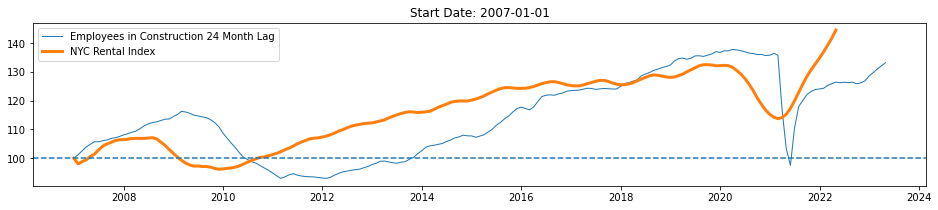

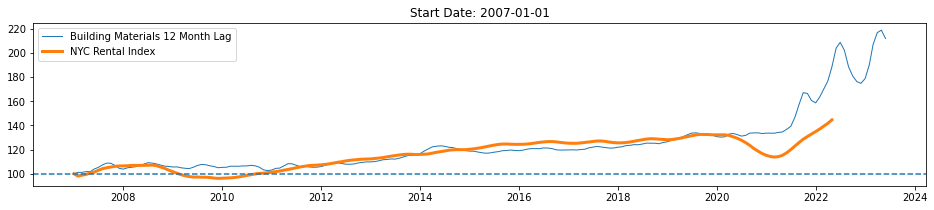

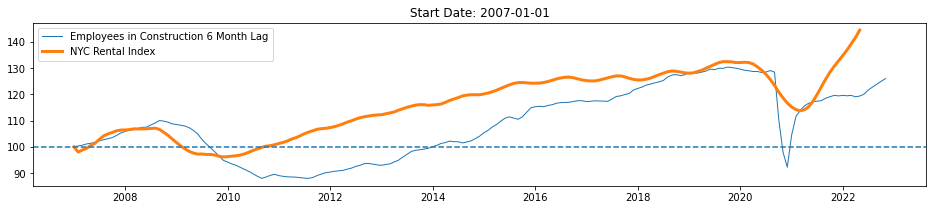

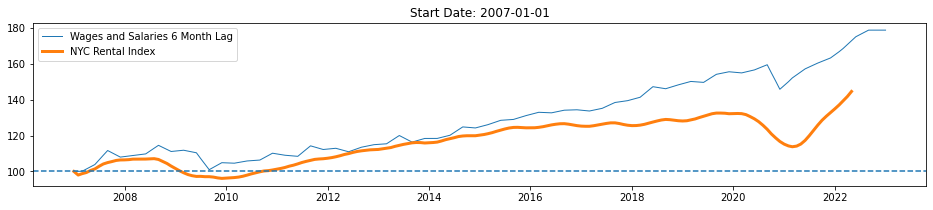

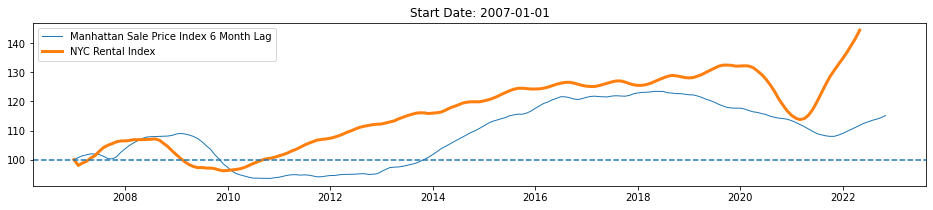

In [31]:
for variable in exogs:
    
    plot_trend(variable)
    plot_target()

## Evaluating VIF Values for Lagged Variables

VIF (Variance Inflation Factor) measures the multicollinearity of a set of predictive variables. A VIF of 10 or greater indicates that a variable can be modeled as a linear combination of the other exogenous variables, which means that coefficients in a linear regression model are likely to be untrustworthy.

In selecting models for testing, we'll therefore limit ourselves to combinations of variables where the maximum VIF is under 10.

In [32]:
chained = itertools.chain.from_iterable(itertools.combinations(exogs, r) for r in range(len(exogs)+1))
exog_combs = [list(n) for n in chained]

def calc_vif(X):
    
    """
    Calculates VIF scores for a dataframe.
    """
    
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [33]:
# calculate VIF values for each combination of variables

vif_list = []
for comb in exog_combs:
    try:
        df_temp = calc_vif(add_constant(all_data[comb].dropna()))
        vif_list.append([comb, df_temp['VIF'][1:].max()])
    except:
        continue
        
vif_df = pd.DataFrame(vif_list, columns=['comb', 'max vif'])

In [34]:
pd.set_option('max_colwidth', 200)

vif_df

,comb,max vif
0,[Employees in Construction 24 Month Lag],1.000000
1,[Building Materials 12 Month Lag],1.000000
2,[Employees in Construction 6 Month Lag],1.000000
3,[Wages and Salaries 6 Month Lag],1.000000
4,[Manhattan Sale Price Index 6 Month Lag],1.000000
5,"[Employees in Construction 24 Month Lag, Building Materials 12 Month Lag]",1.674468
6,"[Employees in Construction 24 Month Lag, Employees in Construction 6 Month Lag]",26.416904
7,"[Employees in Construction 24 Month Lag, Wages and Salaries 6 Month Lag]",5.829619
8,"[Employees in Construction 24 Month Lag, Manhattan Sale Price Index 6 Month Lag]",4.250658
9,"[Building Materials 12 Month Lag, Employees in Construction 6 Month Lag]",1.746317


In [35]:
vif_under_10 = vif_df[vif_df['max vif']<10]
vif_under_10.sort_values(by='max vif')

,comb,max vif
0,[Employees in Construction 24 Month Lag],1.000000
1,[Building Materials 12 Month Lag],1.000000
2,[Employees in Construction 6 Month Lag],1.000000
4,[Manhattan Sale Price Index 6 Month Lag],1.000000
3,[Wages and Salaries 6 Month Lag],1.000000
11,"[Building Materials 12 Month Lag, Manhattan Sale Price Index 6 Month Lag]",1.321569
5,"[Employees in Construction 24 Month Lag, Building Materials 12 Month Lag]",1.674468
9,"[Building Materials 12 Month Lag, Employees in Construction 6 Month Lag]",1.746317
14,"[Wages and Salaries 6 Month Lag, Manhattan Sale Price Index 6 Month Lag]",2.110072
8,"[Employees in Construction 24 Month Lag, Manhattan Sale Price Index 6 Month Lag]",4.250658


## SARIMA and SARIMAX Modeling

We'll now determine optimal SARIMA and SARIMAX models using different combinations of endogenous and exogenous features.

#### Model Features

For SARIMA modeling, we'll evaluate the performance of models with no AR or MA terms and with AR and MA terms at lags 1 and 12, with AR terms at these lags regressed on both Rental Index values and on first differences of these values. We'll then evaluate the models with the lowest AIC and the lowest RMSE based on testing data, adding AR and MA terms if this will reduce autocorrelation of the models' residuals.

For SARIMAX modeling, we'll test the same combinations of SARIMA features combined with the combinations of exogenous variables having a maximum VIF of under 10.

#### Model Selection

In choosing a model to make future predictions we want to select a model that both:

1. Makes good predictions on test data.
2. Is not overfit to the test data.

Data is trained on the first 80% of dates for which Rental Index Values are available - January 2001-April 2019 - and is tested on the last 20% of dates for which Rental Index Values are available - May 2019-May 2022.

A SARIMAX model that makes good predictions on the test data is one that is able to produce less error on this test data than the best SARIMA model, with test error defined as the RMSE of dynamic predictions for the test data. Since exogenous variables are based on lags of a minimum of six months, RMSE of dynamic predictions are a good measure of our model's ability to make future forecasts.

#### The Danger of Overfitting 

The reason that we should be worried about our model being overfit to the test data is that in selecting exogenous lags to use for SARIMAX modeling, we specifically selected lags for which there was a high correlation with rental prices for all periods - including the period of the test data.

#### Avoiding Overfitting with AIC
In order to avoid picking a SARIMAX model that is overfit to the test data, we need to make sure that the AIC score for our model is as low as possible, while still producing a lower testing error than was achieved through simple SARIMA modeling.

In addition to looking at AIC, we'll also look at the error of dynamic predictions for the 2nd, 3rd, and 4th quartiles of training data. The RMSE for these predictions tell us how well our model would have performed had we used it for forecasting on earlier periods. While we won't use this metric for model selection, it will help us to more precisely determine the specific strengths and weaknesses of each model.

### Defining Functions for SARIMA Modeling

In [36]:
def get_rmse(mod, exog=None):
    
    """
    Taking model as input, calculates RMSE for a four different periods including the
    testing period from May 2019-May 2022. Takes in optional exogenous variables.
    """
    rmse_dictionary = {}
    
    for date_range in dates_list[1:]:
        
        start = date_range[0]
        end = date_range[1]
        
        if type(exog)!=type(None):
            subset_exog = exog[start:end]
        else:
            subset_exog=None
            
        y_preds = mod.predict(start=start, end=end, exog=subset_exog, dynamic=True)
        y_vals = rental_data['NYC Rental Index'][start:end]
        rmse = np.sqrt(np.mean((y_preds-y_vals)**2))
        
        rmse_dictionary[f'{str(start)[:4]}-{str(end)[:4]} Error'] = rmse

    return rmse_dictionary

In [37]:
def plot_dynamic(mod, title, exog=None, save=False):
    
    """
    Taking model as input, plots dynamic predictions for four periods, taking in optional exogenous
    variables.
    
    Start and end dates are set to the 2019-2022 period by default.
    
    """
    
    # set fig size
    rcParams['figure.figsize'] = 15, 6

    # Plot observed values
    ax = all_data['NYC Rental Index']['2007-01-01':].plot(label='Observed')

    # Get predictions and confidence intervals from start date to end date
    
    for date_range in dates_list[1:]:
        
        start_date = date_range[0]
        end_date = date_range[1]
        if type(exog)!=type(None):
            exog_input=exog[start_date:end_date]
        else:
            exog_input=None
        pred = mod.get_prediction(start=start_date,
                                  end=end_date,
                                  exog=exog_input,
                                  dynamic=True)
        pred_conf = pred.conf_int()
    
        # Plot predicted values
        pred.predicted_mean.plot(ax=ax, alpha=0.9, label=f'Start={str(start_date)[:10]}')

        # Plot the range for confidence intervals
        ax.fill_between(pred_conf.index,
                        pred_conf.iloc[:, 0],
                        pred_conf.iloc[:, 1], color='g', alpha=0.5)

    # Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('NYC Rental Index')
    ax.set_title(f'{title} Dynamic Predictions')
    
    formatter = ticker.FormatStrFormatter('$%1.0f')
    ax.yaxis.set_major_formatter(formatter)
    
    plt.legend()
    if save==True:
        plt.savefig(f"images/{title.replace(' ', '')}.png")
    plt.show()

In [38]:
rental_data = all_data['2007-01-01':'2022-05-01']

# splitting the data into a training and testing set

train = rental_data.iloc[:int(0.8*len(rental_data))]
test=rental_data.iloc[int(0.8*len(rental_data)):]

### Baseline Model: AR(1)

For a baseline, we'll use a simple autoregression model, since rental prices show consistently high autocorrelation at 1 lag.

In [39]:
baseline_mod = sm.tsa.statespace.SARIMAX(train['NYC Rental Index'],
                                        enforce_stationarity=False,
                                        enforce_invertibility=False).fit(disp=False)
baseline_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       NYC Rental Index   No. Observations:                  148
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -564.355
Date:                Mon, 08 Aug 2022   AIC                           1132.711
Time:                        15:15:25   BIC                           1138.691
Sample:                    01-01-2007   HQIC                          1135.141
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0018      0.000   2128.026      0.000       1.001       1.003
sigma2       126.5233     11.267     11.229      0.000     104.440     148.607
===================================================================================
Ljung-Box (L1) (Q):                  85.10   Jarque-Bera (JB):                92.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                            -1.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

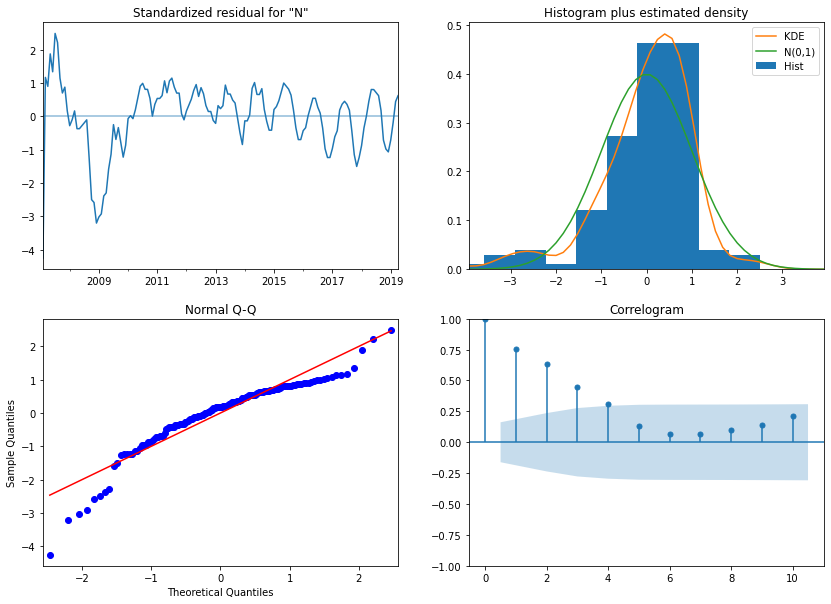

In [40]:
# Call plot_diagnostics() on the results calculated above 
baseline_mod.plot_diagnostics(figsize=(14, 10))
plt.show()

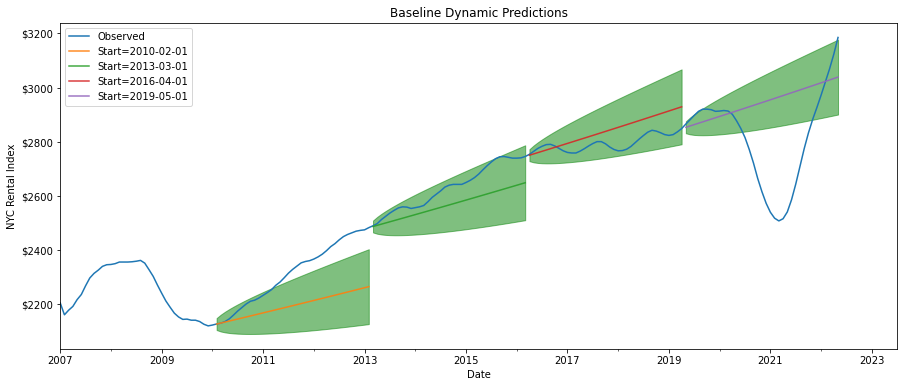

In [41]:
plot_dynamic(baseline_mod, 'Baseline')

In [42]:
for key, value in get_rmse(baseline_mod).items():
    print(f'{key} Error: {value}')

2010-2013 Error Error: 139.37960274232816
2013-2016 Error Error: 72.64128302382373
2016-2019 Error Error: 57.63003523463862
2019-2022 Error Error: 225.92916898732867


The baseline model's dynamic predictions project a steady 0.18%/month growth in rental prices following the last known value. While this closely matches the growth from March 2013-April 2019, it completely fails to predict the drop and rise in rental prices in the May 2019-May 2022 period and also fails to predict the recovery in rental prices in the February 2010-February 2013 period. Without the use of exogenous variables, this level of error for dynamic predictions is to be expected. Since dynamic predictions using a purely autoregressive model only take into account past values of the target series, we wouldn't expect it to successfully model events that are caused by exogenous factors such as the COVID epidemic.

## SARIMA feature selection

Next we find the best performing SARIMA models, both in terms of lowest AIC score and lowest RMSE on the test data.

In [43]:
# Generate combinations of SARIMA values

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [44]:
"""
ans=[]
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(train['NYC Rental Index'],
                                    order = comb,
                                    seasonal_order = combs,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False).fit(disp=False)
                
            errors = list(get_rmse(mod).values())
            ans.append([comb, combs, mod.aic]+errors)
        except:
            continue
            
with open('data/ans_1.pickle', 'wb') as f:
    pickle.dump(ans, f)
"""

"\nans=[]\nfor comb in pdq:\n    for combs in pdqs:\n        try:\n            mod = sm.tsa.statespace.SARIMAX(train['NYC Rental Index'],\n                                    order = comb,\n                                    seasonal_order = combs,\n                                    enforce_stationarity=False,\n                                    enforce_invertibility=False).fit(disp=False)\n                \n            errors = list(get_rmse(mod).values())\n            ans.append([comb, combs, mod.aic]+errors)\n        except:\n            continue\n            \nwith open('data/ans_1.pickle', 'wb') as f:\n    pickle.dump(ans, f)\n"

In [45]:
with open('data/ans_1.pickle', 'rb') as f:
    ans = pickle.load(f)

error_col_names = [f'{date_range} Error' for date_range in ['2010-2013', '2013-2016', '2016-2019', '2019-2022']]

ans_sarima_df = pd.DataFrame(ans, columns=['comb', 'combs', 'aic']+error_col_names)

In [46]:
# summary statistics for SARIMA model performance

ans_sarima_df.describe()

,aic,2010-2013 Error,2013-2016 Error,2016-2019 Error,2019-2022 Error
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1068.527453,353.206915,230.609687,220.392283,366.930712
std,445.328084,482.710348,589.133425,621.791400,588.566418
min,642.962364,80.632073,7.665231,20.135563,176.031463
25%,765.134990,176.038767,38.467068,39.558525,193.106240
50%,901.862582,227.731872,73.282268,57.424191,224.915558
75%,1171.218765,301.012157,129.805540,93.225518,233.142821
max,2720.547265,2315.886597,2631.446180,2793.057000,2818.687403


Here we see that the best performing SARIMA model by 2019-2022 RMSE has an RMSE of 176, while the best performing SARIMA model by AIC has an AIC value of 643. 

The most important metric in selecting our SARIMAX model is that it should have an RMSE lower than 176. However, the closer it is to the AIC benchmark of 643, the less a chance there is that the model has been overfit to the testing data.

In [47]:
ans_sarima_df.sort_values(by='aic').head()

,comb,combs,aic,2010-2013 Error,2013-2016 Error,2016-2019 Error,2019-2022 Error
63,"(1, 1, 1)","(1, 1, 1, 12)",642.962364,204.609638,17.625839,91.542468,236.690689
55,"(1, 1, 0)","(1, 1, 1, 12)",644.875569,219.525724,14.641572,85.640119,237.964518
59,"(1, 1, 1)","(0, 1, 1, 12)",654.775324,147.236098,39.933244,80.144514,239.247897
51,"(1, 1, 0)","(0, 1, 1, 12)",671.185272,97.826175,40.779439,61.560599,247.922805
54,"(1, 1, 0)","(1, 1, 0, 12)",671.497742,104.467339,39.451094,59.588207,249.902032


In [48]:
ans_sarima_df.sort_values(by='2019-2022 Error').head()

,comb,combs,aic,2010-2013 Error,2013-2016 Error,2016-2019 Error,2019-2022 Error
10,"(0, 0, 1)","(0, 1, 0, 12)",1440.145011,206.252831,198.923003,68.248485,176.031463
2,"(0, 0, 0)","(0, 1, 0, 12)",1634.801333,203.210781,204.948642,73.226232,177.111203
7,"(0, 0, 0)","(1, 1, 1, 12)",1443.101182,233.238815,178.806585,54.398975,178.454619
16,"(0, 1, 0)","(0, 0, 0, 12)",1130.891338,222.224929,169.038057,55.385382,178.950016
14,"(0, 0, 1)","(1, 1, 0, 12)",1322.674258,265.874026,158.168962,36.741929,178.974347


### Best SARIMA Model by AIC

Below we examine the best SARIMA model by lowest AIC score:

In [49]:
best_sarima_mod_aic = sm.tsa.statespace.SARIMAX(train['NYC Rental Index'],
                                    order = (1, 1, 1),
                                    seasonal_order = (1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False).fit(disp=False)
best_sarima_mod_aic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   NYC Rental Index   No. Observations:                  148
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -316.481
Date:                            Mon, 08 Aug 2022   AIC                            642.962
Time:                                    15:15:26   BIC                            656.941
Sample:                                01-01-2007   HQIC                           648.640
                                     - 04-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8813      0.038     23.215      0.000       0.807       0.956
ma.L1         -0.0875      0.077     -1.139      0.255      -0.238       0.063
ar.S.L12      -0.0129      0.006     -2.108      0.035      -0.025      -0.001
ma.S.L12      -0.6570      0.105     -6.245      0.000      -0.863      -0.451
sigma2        10.4516      1.180      8.855      0.000       8.138      12.765
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                14.25
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

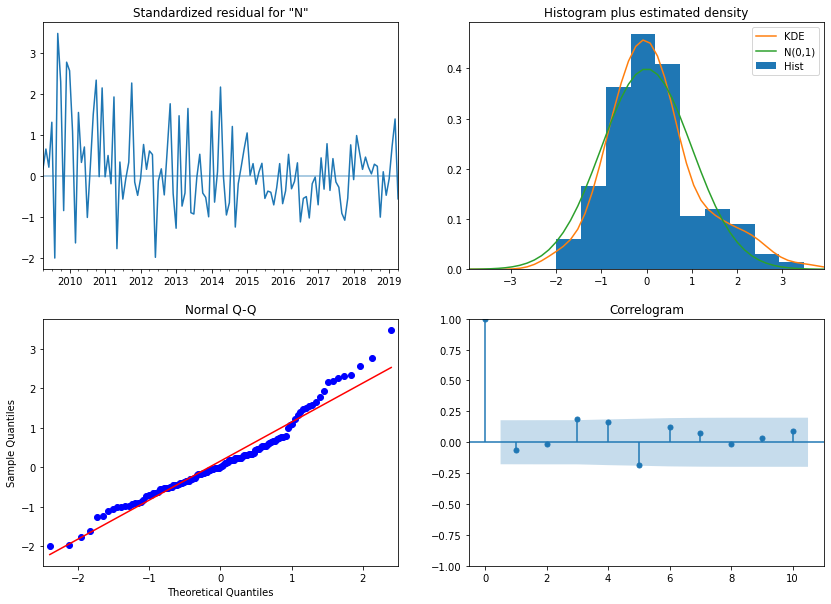

In [50]:
best_sarima_mod_aic.plot_diagnostics(figsize=(14, 10))
plt.show()

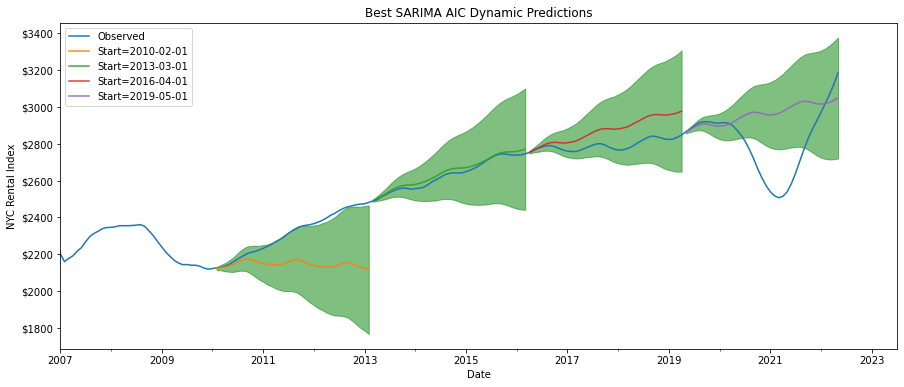

In [51]:
plot_dynamic(best_sarima_mod_aic, 'Best SARIMA AIC')

Like the baseline model, this SARIMA model predicts a continuation of pre-2019 trends through 2022, while including seasonal price fluctuations. Also like the baseline model, the error of its dynamic predictions can be accounted for by the fact that it doesn't include any exogenous variables.

Based on the correlogram, we can probably improve the non-dynamic performance of this model on the training data by adding MA terms through lag 5, since there is a small amount of autocorrelation in the residuals at lags three and five.

However, additional moving average terms would still fail to account for any of the 2019-2022 trends, so we need to turn to SARIMAX modeling to see if the inclusion of exogenous variables in our model is able to improve its performance.

## SARIMAX Feature Selection

Using the combinations of exogenous variables with VIF under 10, we test combinations of endogenous and exogenous terms to find the best SARIMAX model.

In [52]:
"""
ans=[]

for comb in pdq:
    for combs in pdqs:
        for exog in list(vif_under_10['comb']):
            try:
                mod = sm.tsa.statespace.SARIMAX(train['NYC Rental Index'],
                                        exog=train[exog],
                                        order = comb,
                                        seasonal_order = combs,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False).fit(disp=False)
                errors = list(get_rmse(mod, exog=rental_data[exog]).values())
                ans.append([comb, combs, exog, mod.aic]+errors)
            except:
                continue
                
with open('data/ans_2.pickle', 'wb') as f:
    pickle.dump(ans, f)
"""

"\nans=[]\n\nfor comb in pdq:\n    for combs in pdqs:\n        for exog in list(vif_under_10['comb']):\n            try:\n                mod = sm.tsa.statespace.SARIMAX(train['NYC Rental Index'],\n                                        exog=train[exog],\n                                        order = comb,\n                                        seasonal_order = combs,\n                                        enforce_stationarity=False,\n                                        enforce_invertibility=False).fit(disp=False)\n                errors = list(get_rmse(mod, exog=rental_data[exog]).values())\n                ans.append([comb, combs, exog, mod.aic]+errors)\n            except:\n                continue\n                \nwith open('data/ans_2.pickle', 'wb') as f:\n    pickle.dump(ans, f)\n"

In [53]:
with open('data/ans_2.pickle', 'rb') as f:
    ans = pickle.load(f)
    
ans_sarimax_df = pd.DataFrame(ans, columns=['comb', 'combs', 'exog', 'aic']+error_col_names)

In [54]:
ans_sarimax_df.describe()

,aic,2010-2013 Error,2013-2016 Error,2016-2019 Error,2019-2022 Error
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,1087.396200,227.334870,77.778997,65.014339,233.197293
std,339.402130,108.252564,50.181076,43.595378,72.963882
min,644.475814,19.737181,8.143993,11.104579,112.183719
25%,851.071188,147.192439,45.478623,34.581193,183.571600
50%,980.739600,219.421397,66.949763,56.464338,216.102010
75%,1297.315526,295.963215,97.870028,87.935991,256.757874
max,2484.727162,547.378343,465.940057,417.407402,589.478078


Looking at the summary statistics for SARIMAX models, we can see that even the model with the lowest AIC (644) has a higher AIC than the lowest AIC SARIMA model (643). On the other hand, the lowest RMSE for a SARIMAX model is 112 for the test period 2019-2022, whereas the lowest RMSE for a SARIMA model was 176.

### Strategy 1: Minimizing RMSE

We'll begin by simply selecting a model based primarily on RMSE score. Since the top two models use the same exogenous variables (Building Materials 12 Month Lag and Wages and Salaries 6 Month Lag) and have RMSE scores that aren't far apart, we'll choose the model with the lower AIC as well as the lower overall error for the four dynamic predictions.

In [55]:
ans_sarimax_df.sort_values(by='2019-2022 Error').head()

,comb,combs,exog,aic,2010-2013 Error,2013-2016 Error,2016-2019 Error,2019-2022 Error
870,"(1, 0, 1)","(0, 0, 1, 12)","[Building Materials 12 Month Lag, Wages and Salaries 6 Month Lag]",1096.335320,304.127814,223.926498,221.971309,112.183719
933,"(1, 0, 1)","(1, 0, 0, 12)","[Building Materials 12 Month Lag, Wages and Salaries 6 Month Lag]",1055.097231,312.044398,186.951657,154.835030,116.104261
846,"(1, 0, 1)","(0, 0, 0, 12)","[Employees in Construction 24 Month Lag, Wages and Salaries 6 Month Lag]",1282.813971,312.720364,316.939134,217.528118,118.201141
851,"(1, 0, 1)","(0, 0, 0, 12)","[Employees in Construction 6 Month Lag, Wages and Salaries 6 Month Lag]",1256.189955,313.698140,299.113101,197.713025,122.818580
843,"(1, 0, 1)","(0, 0, 0, 12)",[Wages and Salaries 6 Month Lag],1245.117840,312.413382,291.121706,191.152602,124.933953


In [56]:
sarimax_comb_1 = ['Building Materials 12 Month Lag', 'Wages and Salaries 6 Month Lag']

sarimax_mod_rmse = sm.tsa.statespace.SARIMAX(train['NYC Rental Index'],
                                        exog=train[sarimax_comb_1],
                                        order = (1, 0, 1),
                                        seasonal_order = (1, 0, 0, 12),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False).fit(disp=False)
sarimax_mod_rmse.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    NYC Rental Index   No. Observations:                  148
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                -521.549
Date:                             Mon, 08 Aug 2022   AIC                           1055.097
Time:                                     15:15:27   BIC                           1072.529
Sample:                                 01-01-2007   HQIC                          1062.181
                                      - 04-01-2019                                         
Covariance Type:                               opg                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Building Materials 12 Month Lag     9.6100      1.243      7.731      0.000       7.174      12.046
Wages and Salaries 6 Month Lag   1.003e-06   2.26e-07      4.449      0.000    5.61e-07    1.45e-06
ar.L1                               0.9789      0.007    144.515      0.000       0.966       0.992
ma.L1                               0.5450      0.082      6.676      0.000       0.385       0.705
ar.S.L12                            0.4879      0.072      6.788      0.000       0.347       0.629
sigma2                            135.1384      0.029   4599.565      0.000     135.081     135.196
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.39   Prob(JB):                         0.66
Heteroskedasticity (H):               0.25   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.21e+19. Standard errors may be unstable.
"""

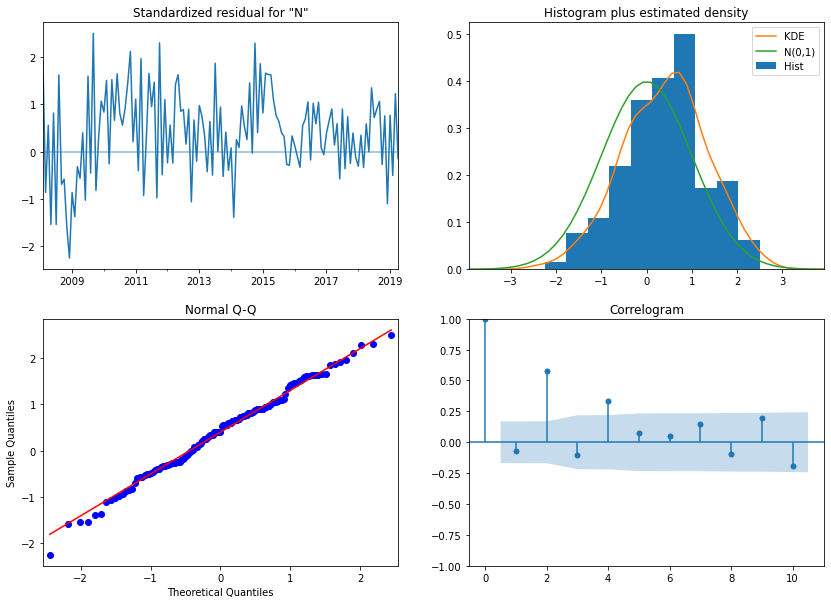

In [57]:
sarimax_mod_rmse.plot_diagnostics(figsize=(14, 10))
plt.show()

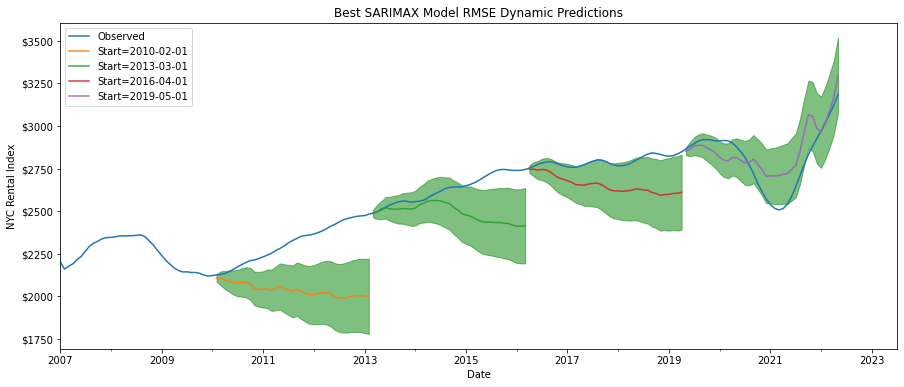

In [58]:
plot_dynamic(sarimax_mod_rmse, 
             title='Best SARIMAX Model RMSE', 
             exog=rental_data[sarimax_comb_1]
             )

While this model does a good job approximating the 2019-2022 period, it performs less well on earlier periods, which is probably related to its lackluster AIC score. It shows significant error in its dynamic predictions, with true values for 2010-2013 lying far above the model's confidence interval.

We might be able to improve this model marginally by adding an AR(2) term, but (1) it's unlikely this would significantly improve its dynamic performance and (2) it wouldn't change the fact that these exogenous variables are poor leading indicators for the pre-2019 period.

### Strategy 2: Low AIC

Our next strategy is to sort SARIMAX models by lowest AIC score. However, as we see below, the models with the lowest AIC score have errors on the 2019-2022 data that are far above the error for the best SARIMA model (RMSE 176), so it's not worth examining these models any further.

In [59]:
ans_sarimax_df.sort_values(by='aic').head()

,comb,combs,exog,aic,2010-2013 Error,2013-2016 Error,2016-2019 Error,2019-2022 Error
1323,"(1, 1, 1)","(1, 1, 1, 12)",[Employees in Construction 24 Month Lag],644.475814,208.603047,12.022301,85.938936,240.407467
1325,"(1, 1, 1)","(1, 1, 1, 12)",[Employees in Construction 6 Month Lag],644.805090,202.194679,19.295946,92.391481,233.151867
1324,"(1, 1, 1)","(1, 1, 1, 12)",[Building Materials 12 Month Lag],644.962352,204.623323,17.604930,91.555050,236.692658
1331,"(1, 1, 1)","(1, 1, 1, 12)","[Building Materials 12 Month Lag, Employees in Construction 6 Month Lag]",646.410664,205.098606,11.971544,87.794528,235.482405
1165,"(1, 1, 0)","(1, 1, 1, 12)","[Building Materials 12 Month Lag, Manhattan Sale Price Index 6 Month Lag]",646.726862,252.944522,25.966719,102.764808,247.846801


### Strategy 3: Low Error, Low AIC

Since none of these high error models are worth adopting over a simpler SARIMA model, we'll next look at the models with the lowest error for the 2019-2022 period and select the model with the lowest AIC score.

In [60]:
ans_sarimax_df.sort_values(by='2019-2022 Error').head(20)

,comb,combs,exog,aic,2010-2013 Error,2013-2016 Error,2016-2019 Error,2019-2022 Error
870,"(1, 0, 1)","(0, 0, 1, 12)","[Building Materials 12 Month Lag, Wages and Salaries 6 Month Lag]",1096.335320,304.127814,223.926498,221.971309,112.183719
933,"(1, 0, 1)","(1, 0, 0, 12)","[Building Materials 12 Month Lag, Wages and Salaries 6 Month Lag]",1055.097231,312.044398,186.951657,154.835030,116.104261
846,"(1, 0, 1)","(0, 0, 0, 12)","[Employees in Construction 24 Month Lag, Wages and Salaries 6 Month Lag]",1282.813971,312.720364,316.939134,217.528118,118.201141
851,"(1, 0, 1)","(0, 0, 0, 12)","[Employees in Construction 6 Month Lag, Wages and Salaries 6 Month Lag]",1256.189955,313.698140,299.113101,197.713025,122.818580
843,"(1, 0, 1)","(0, 0, 0, 12)",[Wages and Salaries 6 Month Lag],1245.117840,312.413382,291.121706,191.152602,124.933953
239,"(0, 0, 1)","(0, 1, 1, 12)","[Building Materials 12 Month Lag, Employees in Construction 6 Month Lag]",1259.693432,282.114645,67.788303,25.948413,124.978491
228,"(0, 0, 1)","(0, 1, 0, 12)","[Building Materials 12 Month Lag, Employees in Construction 6 Month Lag, Manhattan Sale Price Index 6 Month Lag]",1396.798100,260.262540,86.035689,21.575391,125.329020
276,"(0, 0, 1)","(1, 0, 1, 12)",[Wages and Salaries 6 Month Lag],1801.917459,267.973694,147.069255,59.731634,126.532760
71,"(0, 0, 0)","(0, 1, 1, 12)","[Building Materials 12 Month Lag, Employees in Construction 6 Month Lag]",1440.083600,276.637690,65.446117,29.816860,127.416397
984,"(1, 0, 1)","(1, 1, 0, 12)","[Building Materials 12 Month Lag, Employees in Construction 6 Month Lag, Manhattan Sale Price Index 6 Month Lag]",855.300748,322.228293,62.459490,86.934231,127.931378


By far the best model according to these criterion is model 984, with SARIMA features (1, 0, 1)x(1, 1, 0, 12) and exogenous variables 'Building Materials 12 Month Lag', 'Employees in Construction 6 Month Lag,  and 'Manhattan Sale Price Index 6 Month Lag.' It's AIC is 855, around 60 points lower than the second lowest AIC in this group (912).

This model also has an RMSE of 128 for dynamic predictions on the test data. This is only 26 greater than the RMSE for the model with the least testing error its the AIC score is  much lower (855 compared to 1096).

The one thing that should give us pause is that this model's dynamic predictions have a high level of error for 2010-2013, but we may be able to reduced this error by adding additional AR terms.

### Best SARIMAX Model Combined RMSE / AIC

In [61]:
sarimax_comb_2 = ['Building Materials 12 Month Lag', 'Employees in Construction 6 Month Lag', 'Manhattan Sale Price Index 6 Month Lag']

sarimax_mod_aic = sm.tsa.statespace.SARIMAX(train['NYC Rental Index'],
                                        exog=train[sarimax_comb_2],
                                        order = (1, 0, 1),
                                        seasonal_order = (1, 1, 0, 12),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False).fit(disp=False)
sarimax_mod_aic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    NYC Rental Index   No. Observations:                  148
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                -420.650
Date:                             Mon, 08 Aug 2022   AIC                            855.301
Time:                                     15:15:28   BIC                            874.986
Sample:                                 01-01-2007   HQIC                           863.297
                                      - 04-01-2019                                         
Covariance Type:                               opg                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Building Materials 12 Month Lag            2.7736      0.748      3.710      0.000       1.308       4.239
Employees in Construction 6 Month Lag     15.3717      2.343      6.560      0.000      10.779      19.964
Manhattan Sale Price Index 6 Month Lag    -0.0003      0.000     -1.543      0.123      -0.001    6.87e-05
ar.L1                                      0.9900      0.015     66.196      0.000       0.961       1.019
ma.L1                                      0.5568      0.085      6.586      0.000       0.391       0.723
ar.S.L12                                  -0.3357      0.056     -6.008      0.000      -0.445      -0.226
sigma2                                    45.1490      5.487      8.229      0.000      34.395      55.903
===================================================================================
Ljung-Box (L1) (Q):                   9.76   Jarque-Bera (JB):                 4.73
Prob(Q):                              0.00   Prob(JB):                         0.09
Heteroskedasticity (H):               0.20   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

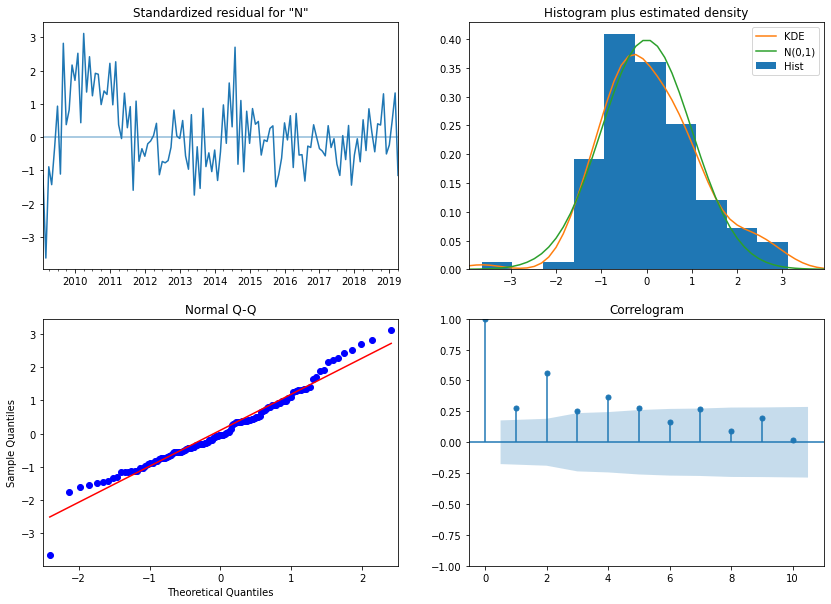

In [62]:
sarimax_mod_aic.plot_diagnostics(figsize=(14, 10))
plt.show()

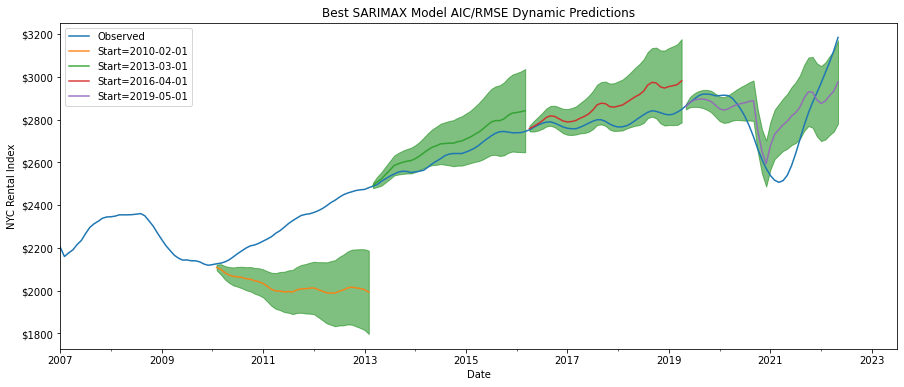

In [63]:
plot_dynamic(sarimax_mod_aic, 
             title='Best SARIMAX Model AIC/RMSE', 
             exog=rental_data[sarimax_comb_2])

### Model Tuning

In order to reduce the autocorrelation of this model's residuals I added an AR term at lag 2 and additional MA terms through lag 7.

In [64]:
sarimax_mod_aic = sm.tsa.statespace.SARIMAX(train['NYC Rental Index'],
                                        exog=train[sarimax_comb_2],
                                        order = (2, 0, 7),
                                        seasonal_order = (1, 1, 0, 12),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False).fit(disp=False)
sarimax_mod_aic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    NYC Rental Index   No. Observations:                  148
Model:             SARIMAX(2, 0, 7)x(1, 1, [], 12)   Log Likelihood                -403.556
Date:                             Mon, 08 Aug 2022   AIC                            835.113
Time:                                     15:15:30   BIC                            874.369
Sample:                                 01-01-2007   HQIC                           851.057
                                      - 04-01-2019                                         
Covariance Type:                               opg                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Building Materials 12 Month Lag            6.5523      0.986      6.642      0.000       4.619       8.486
Employees in Construction 6 Month Lag     16.1230      3.053      5.281      0.000      10.140      22.106
Manhattan Sale Price Index 6 Month Lag    -0.0001      0.000     -0.505      0.614      -0.001       0.000
ar.L1                                      1.8678      0.080     23.298      0.000       1.711       2.025
ar.L2                                     -0.8895      0.076    -11.724      0.000      -1.038      -0.741
ma.L1                                     -0.4191      0.116     -3.628      0.000      -0.645      -0.193
ma.L2                                      0.0150      0.126      0.119      0.905      -0.232       0.261
ma.L3                                     -0.2641      0.131     -2.015      0.044      -0.521      -0.007
ma.L4                                      0.2755      0.135      2.041      0.041       0.011       0.540
ma.L5                                      0.2218      0.123      1.798      0.072      -0.020       0.464
ma.L6                                     -0.1353      0.142     -0.954      0.340      -0.414       0.143
ma.L7                                      0.3597      0.147      2.448      0.014       0.072       0.648
ar.S.L12                                  -0.2406      0.082     -2.948      0.003      -0.401      -0.081
sigma2                                    51.0684     10.887      4.691      0.000      29.730      72.407
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.93   Prob(JB):                         0.65
Heteroskedasticity (H):               0.51   Skew:                             0.19
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

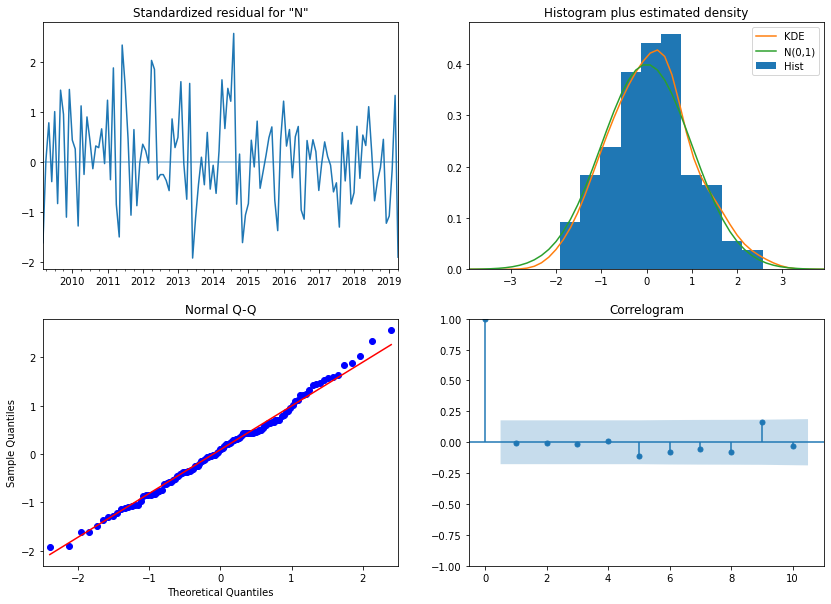

In [65]:
sarimax_mod_aic.plot_diagnostics(figsize=(14, 10))
plt.show()

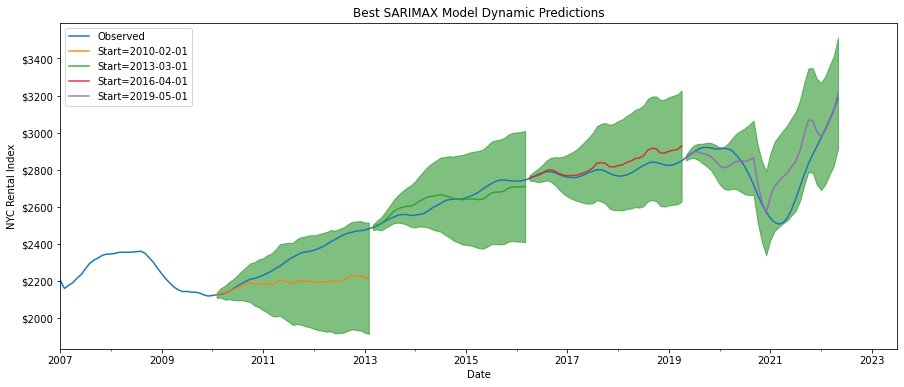

In [66]:
plot_dynamic(sarimax_mod_aic, 
             title='Best SARIMAX Model', 
             exog=rental_data[sarimax_comb_2],
             save=True)

In [67]:
for key, value in get_rmse(sarimax_mod_aic, exog=rental_data[sarimax_comb_2]).items():
    print(f'{key} Error: {value}')

2010-2013 Error Error: 154.20318796561924
2013-2016 Error Error: 42.74161151619609
2016-2019 Error Error: 46.97012738731243
2019-2022 Error Error: 124.69501192325222


We can see that adding the additional SARIMA terms decreased the error of the model significantly for all periods as well as reducing AIC from 855 to 835. Consequently, we'll choose this as our best model.

### Variable effects

Below we can see the range of effects that each exogenous variable has on our SARIMAX model.

Building Materials 12 Month Lag and Employees in Construction 6 Month Lag make the largest average contributions to Rental Prices, whereas Manhattan Sale Prices contribute a much smaller negative effect to the model. The effects for the other two variables are statistically significant (p-values significantly below 0.001), whereas the effect of Manhattan Sale Prices has a p-value of 0.614, meaning that the negative coefficient doesn't imply a negative relationship between Manhattan Sale Prices and New York rents. 

In [68]:
(sarimax_mod_aic.params[sarimax_comb_2]*rental_data[sarimax_comb_2]).describe()

,Building Materials 12 Month Lag,Employees in Construction 6 Month Lag,Manhattan Sale Price Index 6 Month Lag
count,185.000000,185.000000,185.000000
mean,892.443508,848.355858,-120.220341
std,113.302752,102.657599,11.117226
min,750.456909,688.883608,-136.766651
25%,801.564860,766.537766,-130.363870
50%,890.676157,842.364512,-120.142374
75%,934.576576,928.350377,-110.041196
max,1413.768211,1021.175110,-103.611834


In the plot below we can see the effect that each of these parameters has on the model's predictions over time. According to our model:

1. The drop of employees in the construction sector is a leading indicator for the fall in rental prices during COVID, and the rise and fall of employees in construction was a leading indicator for the rise and fall of rents in the months leading up to and following the bursting of the housing bubble in 2007.
2. The recent rise in the cost of construction materials is a leading indicator for the rise in rental prices.

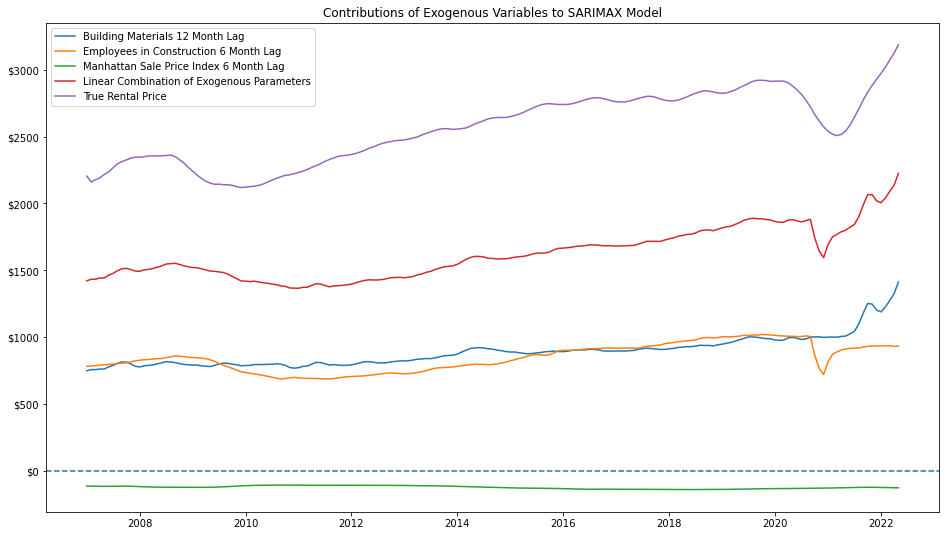

In [69]:
exog_sum = 0
fig, ax = plt.subplots(figsize=(16, 9))
for param in list(sarimax_mod_aic.params.index)[:3]:
    
    plt.plot(sarimax_mod_aic.params[param]*rental_data[param],
             label=param)
    
    exog_sum += sarimax_mod_aic.params[param]*rental_data[param]
    
plt.plot(exog_sum,
         label='Linear Combination of Exogenous Parameters')

plt.plot(rental_data['NYC Rental Index'],
        label='True Rental Price')
plt.axhline(y=0, ls='--')

formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)

plt.legend(loc='upper left')
plt.title('Contributions of Exogenous Variables to SARIMAX Model')
plt.savefig('images/exog_contributions_best.png')
plt.show()

## Forecasting with our SARIMAX Model

We'll now use our SARIMAX model to forecast future movements in the rental market. In order to extend the length of our predictions, we'll extrapolate additional values for our exogenous variables by finding the average monthly increase for each of these variables for the final 12 months of data and projecting their future monthly growth using these values.

In [70]:
# Calculating average monthly increase over the past year 
# for each of our model's exogenous variables

increase_dictionary = {}

for param in list(sarimax_mod_aic.params.index)[:3]:
    all_data[f'{param} 1 Lag'] = all_data[param].shift(periods=1)
    all_data[f'{param} Monthly Increase'] = all_data[param]/all_data[f'{param} 1 Lag']
    all_data.drop(f'{param} 1 Lag', axis=1, inplace=True)
    
    avg_monthly_increase = float(all_data[f'{param} Monthly Increase'].dropna().rolling(12).mean().tail(1))
    increase_dictionary[param] = avg_monthly_increase
    
    all_data.drop(f'{param} Monthly Increase', axis=1, inplace=True)

In [71]:
# Calculated increase for each exogenous variable.

increase_dictionary

{'Building Materials 12 Month Lag': 1.004198654964333,
 'Employees in Construction 6 Month Lag': 1.004352166147914,
 'Manhattan Sale Price Index 6 Month Lag': 1.0053445870650848}

In [72]:
# making a copy of the original dataframe in which to include projected values.

all_data_copy = all_data.copy()

In [73]:
# Calculating and extrapolating projected values for exogenous variables
# into the copied dataframe. Extrapolated values extend through June 2023.

for column in increase_dictionary:
    
    last_value = float(all_data_copy[column].dropna().tail(1))

    nan_count = all_data_copy[column].tail(12).isna().sum()

    forecast_value_list = [last_value*((increase_dictionary[column])**n) for n in range(1, nan_count+1)]
    all_data_copy[column][-nan_count:] = forecast_value_list
  

### Retraining our model on the full dataset


We now retrain our model for the full January 2007-May 2022 period.

In [74]:
sarimax_mod_aic = sm.tsa.statespace.SARIMAX(rental_data['NYC Rental Index'],
                                        exog=rental_data[['Building Materials 12 Month Lag', 'Employees in Construction 6 Month Lag','Manhattan Sale Price Index 6 Month Lag']],
                                        order = (2, 0, 7),
                                        seasonal_order = (1, 1, 0, 12),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False).fit(disp=False)
sarimax_mod_aic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    NYC Rental Index   No. Observations:                  185
Model:             SARIMAX(2, 0, 7)x(1, 1, [], 12)   Log Likelihood                -715.648
Date:                             Mon, 08 Aug 2022   AIC                           1459.296
Time:                                     15:15:32   BIC                           1502.261
Sample:                                 01-01-2007   HQIC                          1476.744
                                      - 05-01-2022                                         
Covariance Type:                               opg                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Building Materials 12 Month Lag            7.2239      1.952      3.701      0.000       3.399      11.049
Employees in Construction 6 Month Lag     21.0244      2.433      8.642      0.000      16.256      25.793
Manhattan Sale Price Index 6 Month Lag     0.0001      0.001      0.119      0.905      -0.002       0.003
ar.L1                                      1.5048      0.536      2.807      0.005       0.454       2.555
ar.L2                                     -0.5402      0.547     -0.987      0.324      -1.613       0.533
ma.L1                                      0.1624      0.497      0.327      0.744      -0.811       1.136
ma.L2                                     -0.0045      0.621     -0.007      0.994      -1.222       1.213
ma.L3                                     -0.6653      0.193     -3.450      0.001      -1.043      -0.287
ma.L4                                      0.0186      0.455      0.041      0.967      -0.873       0.910
ma.L5                                      0.4067      0.452      0.899      0.368      -0.480       1.293
ma.L6                                      0.1167      0.197      0.593      0.553      -0.269       0.502
ma.L7                                      0.2557      0.402      0.637      0.524      -0.532       1.043
ar.S.L12                                  -0.8489      0.305     -2.782      0.005      -1.447      -0.251
sigma2                                   831.5283    179.019      4.645      0.000     480.657    1182.400
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              3221.94
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               4.86   Skew:                             2.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

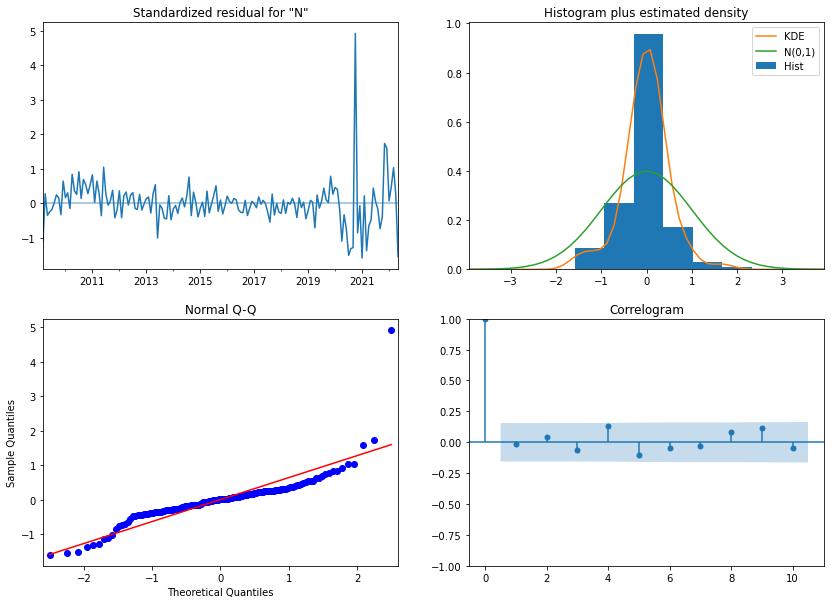

In [75]:
# Call plot_diagnostics() on the results calculated above 
sarimax_mod_aic.plot_diagnostics(figsize=(14, 10))
plt.show()

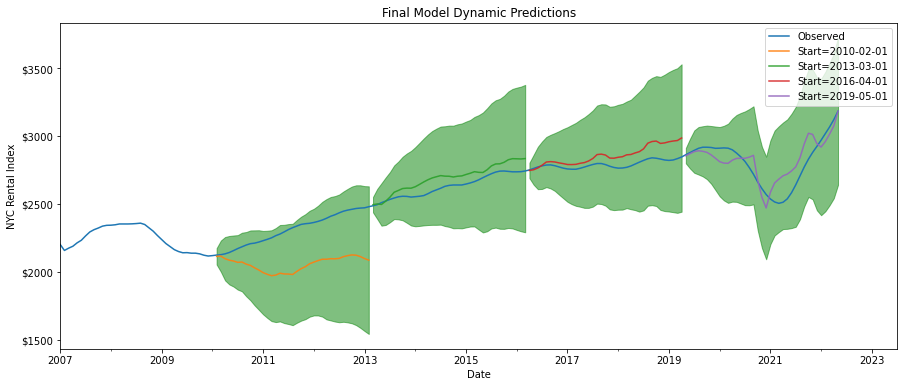

In [76]:
plot_dynamic(sarimax_mod_aic, 
            title='Final Model',  
            exog=test[['Building Materials 12 Month Lag', 'Employees in Construction 6 Month Lag', 'Manhattan Sale Price Index 6 Month Lag']],
            save=True)

In [77]:
for key, value in get_rmse(sarimax_mod_aic, exog=rental_data[sarimax_comb_2]).items():
    print(f'{key} Error: {value}')

2010-2013 Error Error: 274.4147496486431
2013-2016 Error Error: 69.4251739789751
2016-2019 Error Error: 79.31573669345313
2019-2022 Error Error: 100.4296255944838


In [78]:
(sarimax_mod_aic.params[sarimax_comb_2]*rental_data[sarimax_comb_2]).describe()

,Building Materials 12 Month Lag,Employees in Construction 6 Month Lag,Manhattan Sale Price Index 6 Month Lag
count,185.000000,185.000000,185.000000
mean,983.923974,1106.258372,151.870431
std,124.916920,133.865792,14.044028
min,827.382952,898.306119,130.889446
25%,883.729754,999.567354,139.011450
50%,981.975460,1098.445639,151.771938
75%,1030.375918,1210.571444,164.684420
max,1558.687384,1331.615150,172.772845


### Retrained Model Performance

In some respects our retrained model seems to perform poorly on the full dataset. It shows a much higher than average level of error for the 2019-2022 period and consequently has a quite high kurtosis of 24.40. 

However, the retrained model performed well by two important metrics:

1. Three year dynamic predictions continued to fall within the model's 95% confidence interval 

2. The exogenous parameter coefficients for the retrained model all fell within the 95% confidence interval established for these same parameters based on 2007-2019 data. 

Both these metrics indicate our model's ability to make consistently good predictions under changing economic conditions.

### Retrained Model Forecast

Below we see the forecasts made by our trained model through June 2023, including the upper and lowest bounds of the model's 95% confidence interval.

In [79]:
all_data_copy['NYC Rental Index'].dropna().tail()

2022-01-01    2972.0
2022-02-01    3020.0
2022-03-01    3069.0
2022-04-01    3123.0
2022-05-01    3185.0
Freq: MS, Name: NYC Rental Index, dtype: float64

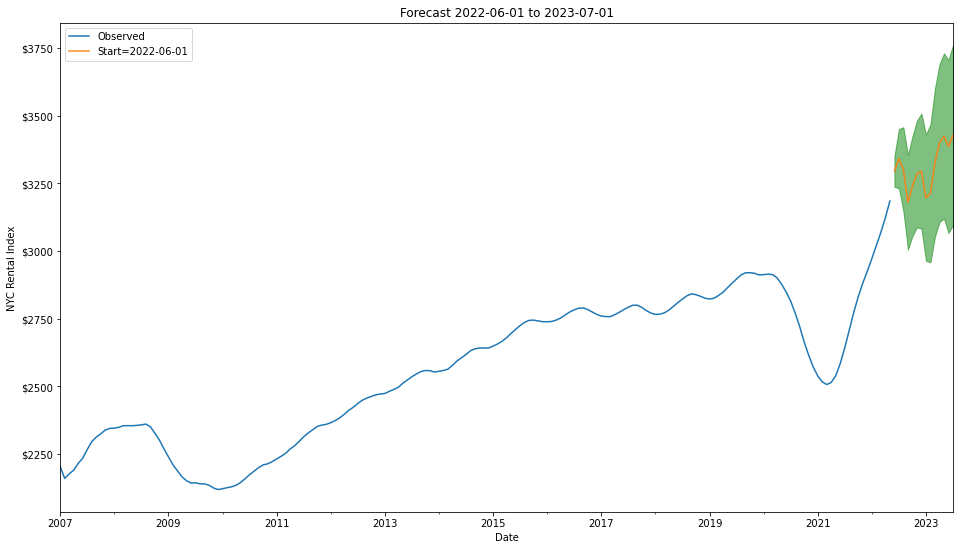

In [80]:
start_date = '2022-06-01'
end_date = '2023-07-01'

fig, ax = plt.subplots(figsize=(16, 9))
# Plot observed values
ax = all_data['NYC Rental Index']['2007-01-01':].plot(label='Observed')


pred = sarimax_mod_aic.get_prediction(start=start_date,
                          end=end_date,
                          exog=all_data_copy[sarimax_comb_2][start_date:end_date],
                          dynamic=True)
pred_conf = pred.conf_int()
    
# Plot predicted values
pred.predicted_mean.plot(ax=ax, alpha=0.9, label=f'Start={str(start_date)[:10]}')

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)
# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('NYC Rental Index')
ax.set_title(f'Forecast {start_date} to {end_date}')

formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)

plt.legend(loc='upper left')

plt.savefig('images/forecast.png')
plt.show()

In [81]:
pd.concat([pred.predicted_mean, pred_conf], axis=1)

,predicted_mean,lower NYC Rental Index,upper NYC Rental Index
2022-06-01,3294.143341,3237.575168,3350.711513
2022-07-01,3341.571549,3231.643063,3451.500035
2022-08-01,3301.605927,3145.407736,3457.804119
2022-09-01,3180.019982,3005.196805,3354.843159
2022-10-01,3239.831365,3055.238143,3424.424586
2022-11-01,3284.868155,3087.540260,3482.196050
2022-12-01,3295.572786,3082.819721,3508.325851
2023-01-01,3197.359915,2963.766443,3430.953386
2023-02-01,3213.591859,2958.633235,3468.550484
2023-03-01,3327.816439,3053.346480,3602.286398


As we can see from the chart and table above, our model predicts that the rapid rise in rents that we've seen thus far will slow down over the next year.

The model's predicted mean indicates dropping rents through September following a July peak, followed by a stabilization around $3400/month by mid-2023.

The worst-case scenario for renters shows rents continuing to shoot up above 3700 by mid-2023, while the best-case scenario shows rents stabilizing at around $3100/month.

However, all scenarios show rents stabilizing between \\$2900 and \\$3500 in the latter part of 2022 through early 2023.

### Effects of exogenous variables

The chart below show the effects of each of our exogenous variables on these predictions. The projected September dip in rents is predicted because of the fall in the cost of building materials from July-September 2021, while the subsequent predicted rise in rents comes from the rise in the cost of building materials after September 2021.

Looking at the Building Materials curve we can see that the PPI value has been slowing over the long term, likely indicating that prices are being stabilized by limits in demand. Regardless of whether these limits are the result of lagging wage growth or of monetary policy, they suggest a light at the end of the tunnel with regards to inflation and a coming stabilization in rental prices.

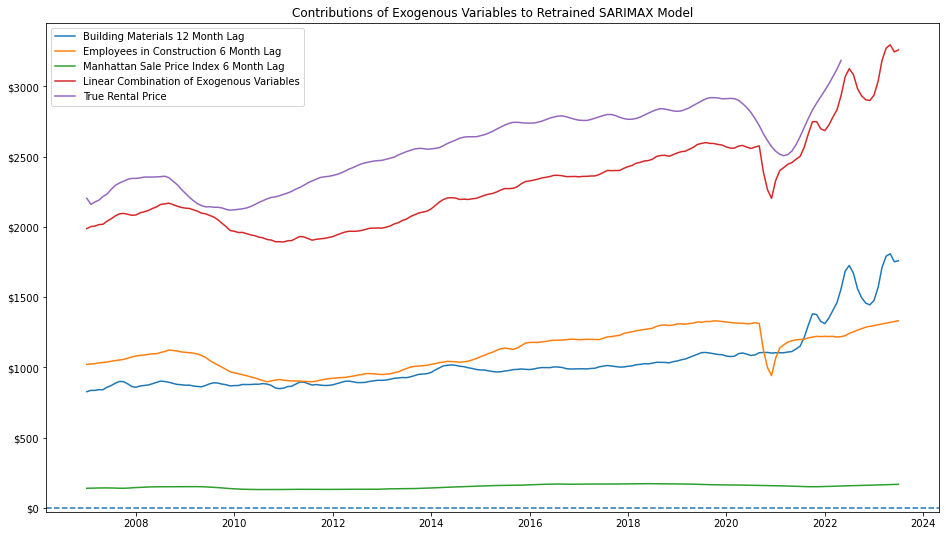

In [82]:
exog_sum = 0

fig, ax = plt.subplots(figsize=(16, 9))

for param in list(sarimax_mod_aic.params.index)[:3]:
    
    plt.plot(sarimax_mod_aic.params[param]*all_data_copy[param]['2007-01-01':],
             label=param)
    
    exog_sum += sarimax_mod_aic.params[param]*all_data_copy[param]['2007-01-01':]
    
plt.plot(exog_sum,
         label='Linear Combination of Exogenous Variables')

plt.plot(rental_data['NYC Rental Index'],
        label='True Rental Price')
plt.axhline(y=0, ls='--')

formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)

plt.legend(loc='upper left')
plt.title('Contributions of Exogenous Variables to Retrained SARIMAX Model')
plt.savefig('images/exog_contributions_final.png')
plt.show()

### Recommendation and Caveats

Based on our model, we would recommend that renters wait until fall or winter to look for apartments since that's when rents are expected to hit a minimum before rising again. 

We also recommend that if renters are able to sign a two year lease that they not pay more than 8% above what they would be paying for a one year lease. This is because, according to our mean prediction, rents are expected to rise about 7.5% between May 2022 and May 2023.

However, despite the fact that this is the best recommendation that we can make based on our model, renters probably would be wise to consider other factors as well.

The greatest strength of our model is its greatest weakness: Namely, that it has been built based on its performance across the entire 2007-2022 period. Because of this, we were only able to include extremely general market patterns and were not able to include more specific conjunctural occurences, such as Fed Interest Rate hikes, which are difficult to model even though they have major effects on markets. 

Another weakness is the limited amount of data that we used to build our model. There's a small chance that the relationship between Building Materials, Employees in Construction and Rental Prices is purely coincidental, so some of our confidence in this model has to come from our confidence in the basic economic principles that underlie these relationships. 